## Section 2. Data Understanding
### 2.1 Dataset Information

In [60]:
import os
import warnings
from pathlib import Path

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Statistics
from scipy.stats import spearmanr, normaltest, mannwhitneyu

# Suppress all warnings
warnings.filterwarnings("ignore")

# Set pandas display options for better visibility
pd.set_option("display.max_columns", None)

# Set Seaborn theme for better aesthetics
sns.set_theme()


data_path = Path("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

if data_path.exists():
    real_df = pd.read_csv(data_path)
    df = real_df.copy()
    print(df.info())
    display(df.head())
else:
    print(f"File not found: {data_path}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Berikut adalah penjelasan untuk masing-masing kolom:

<table>
    <thead>
        <tr>
            <th>Kolom</th>
            <th>Definisi</th>
            <th>Value dan Penjelasan</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>customerID</b></td>
            <td>ID unik untuk setiap pelanggan.</td>
            <td><code>Teks alfanumerik</code>: Kode unik pengenal pelanggan.</td>
        </tr>
        <tr>
            <td><b>gender</b></td>
            <td>Jenis kelamin pelanggan.</td>
            <td><code>Male</code>: Laki-laki.<br><code>Female</code>: Perempuan.</td>
        </tr>
        <tr>
            <td><b>SeniorCitizen</b></td>
            <td>Apakah pelanggan seorang warga senior.</td>
            <td><code>1</code>: Ya, warga senior.<br><code>0</code>: Bukan warga senior.</td>
        </tr>
        <tr>
            <td><b>Partner</b></td>
            <td>Apakah pelanggan memiliki pasangan.</td>
            <td><code>Yes</code>: Punya pasangan.<br><code>No</code>: Tidak punya pasangan.</td>
        </tr>
        <tr>
            <td><b>Dependents</b></td>
            <td>Apakah pelanggan memiliki tanggungan.</td>
            <td><code>Yes</code>: Punya tanggungan.<br><code>No</code>: Tidak punya tanggungan.</td>
        </tr>
        <tr>
            <td><b>tenure</b></td>
            <td>Lama berlangganan dalam bulan.</td>
            <td><code>Numerik</code>: Jumlah bulan pelanggan bersama perusahaan.</td>
        </tr>
        <tr>
            <td><b>Contract</b></td>
            <td>Jenis kontrak berlangganan.</td>
            <td><code>Month-to-month</code>: Kontrak bulanan.<br><code>One year</code>: Kontrak satu tahun.<br><code>Two year</code>: Kontrak dua tahun.</td>
        </tr>
        <tr>
            <td><b>PaperlessBilling</b></td>
            <td>Menggunakan tagihan elektronik.</td>
            <td><code>Yes</code>: Tagihan via email.<br><code>No</code>: Tagihan fisik.</td>
        </tr>
        <tr>
            <td><b>PaymentMethod</b></td>
            <td>Metode pembayaran yang digunakan.</td>
            <td><code>Electronic check</code>: Pembayaran dengan cek elektronik.<br><code>Mailed check</code>: Pembayaran dengan mengirimkan cek fisik.<br><code>Bank transfer (automatic)</code>: Pembayaran melalui transfer bank otomatis.<br><code>Credit card (automatic)</code>: Pembayaran melalui kartu kredit otomatis.</td>
        </tr>
        <tr>
            <td><b>MonthlyCharges</b></td>
            <td>Tagihan setiap bulan.</td>
            <td><code>Numerik Desimal</code>: Total biaya bulanan untuk semua layanan.</td>
        </tr>
        <tr>
            <td><b>TotalCharges</b></td>
            <td>Total tagihan selama berlangganan.</td>
            <td><code>Numerik Desimal</code>: Akumulasi semua tagihan bulanan.</td>
        </tr>
        <tr>
            <td><b>PhoneService</b></td>
            <td>Apakah pelanggan punya layanan telepon.</td>
            <td><code>Yes</code>: Punya layanan telepon.<br><code>No</code>: Tidak punya.</td>
        </tr>
        <tr>
            <td><b>MultipleLines</b></td>
            <td>Apakah punya lebih dari satu saluran telepon.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Punya telepon, tapi hanya 1 saluran.<br><code>No phone service</code>: Tidak punya layanan telepon.</td>
        </tr>
        <tr>
            <td><b>InternetService</b></td>
            <td>Tipe layanan internet pelanggan.</td>
            <td><code>DSL</code>: Layanan internet melalui jalur telepon standar.<br><code>Fiber optic</code>: Layanan internet berkecepatan tinggi melalui kabel fiber optik.<br><code>No</code>: Tidak berlangganan internet.</td>
        </tr>
        <tr>
            <td><b>OnlineSecurity</b></td>
            <td>Apakah punya layanan keamanan online.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>OnlineBackup</b></td>
            <td>Apakah punya layanan backup online.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>DeviceProtection</b></td>
            <td>Apakah punya proteksi perangkat.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>TechSupport</b></td>
            <td>Apakah punya dukungan teknis premium.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>StreamingTV</b></td>
            <td>Apakah streaming TV dari Telco.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>StreamingMovies</b></td>
            <td>Apakah streaming film dari Telco.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>Churn</b></td>
            <td><b>(Target)</b> Apakah pelanggan berhenti.</td>
            <td><code>Yes</code>: Pelanggan berhenti berlangganan.<br><code>No</code>: Pelanggan masih aktif.</td>
        </tr>
    </tbody>
</table>

### 2.2 Missing Values Checking

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


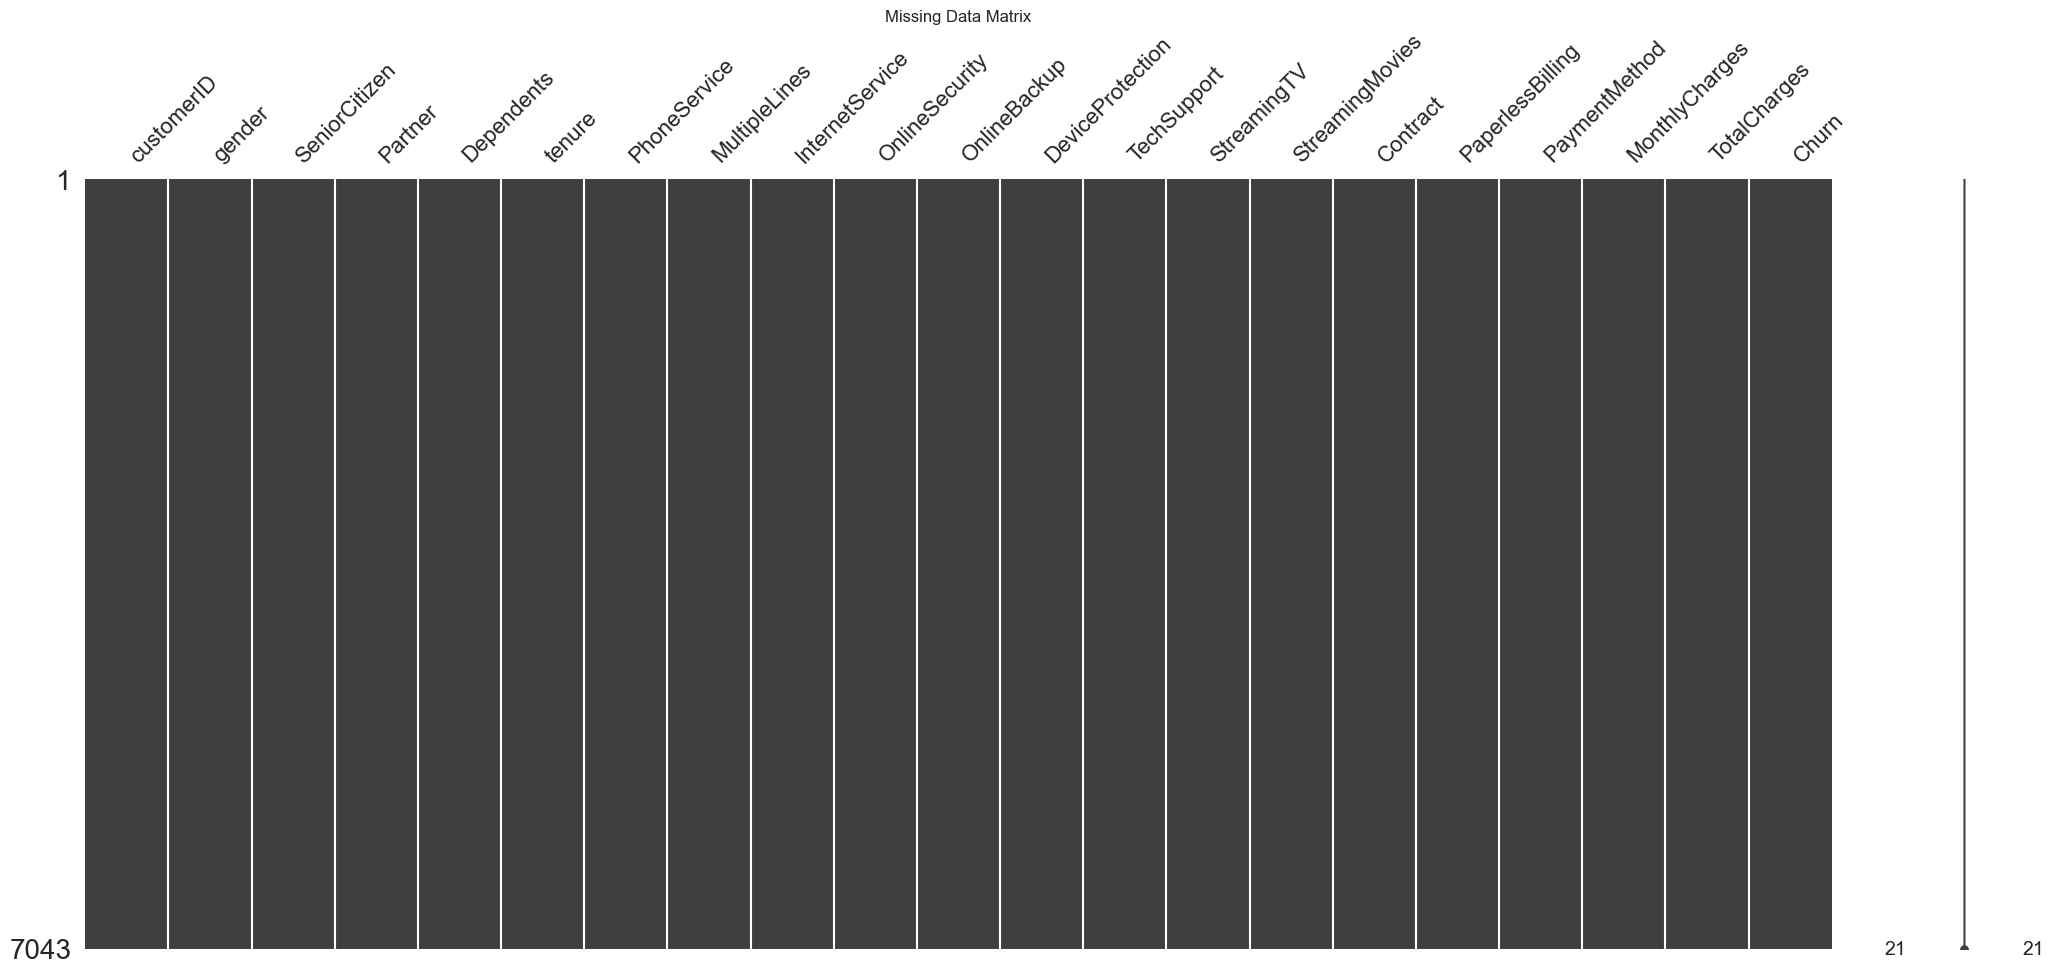

In [61]:
# Check missing values count per column
missing_counts = df.isnull().sum()
print(missing_counts)

# Visualize missing data pattern
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

Meskipun tidak terdapat missing values secara eksplisit dalam dataset, keberadaan nilai `tenure = 0` perlu diperhatikan karena dapat merepresentasikan pelanggan yang baru mendaftar dan belum benar-benar aktif, atau langsung churn pada bulan pertama. Hal ini penting karena bisa mempengaruhi kualitas data dan performa model machine learning, terutama jika jumlahnya kecil namun berdampak besar dalam proses pembelajaran model. Dari sisi bisnis, pelanggan dengan `tenure = 0` mungkin belum sempat menggunakan layanan secara penuh, sehingga berpotensi mencerminkan signup palsu atau pembatalan instan. Oleh karena itu, baris dengan nilai ini sebaiknya dianalisis lebih lanjut, dipertimbangkan untuk dipisahkan, atau bahkan dibuang jika tidak relevan.

In [62]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Dari tabel yang ditampilkan, terlihat bahwa seluruh baris dengan `tenure = 0` memiliki nilai `TotalCharges` yang kosong (missing). Ini memperkuat indikasi adanya **anomali data**, karena secara logika bisnis, jika seorang pelanggan sudah memiliki `MonthlyCharges` tetapi `TotalCharges` kosong, hal ini tidak konsisten. Seharusnya, meskipun pelanggan baru, `TotalCharges` minimal setara dengan `MonthlyCharges` jika telah berjalan satu bulan. Selain itu, sebagian besar pelanggan ini memiliki kontrak jangka panjang seperti "Two year", yang tidak wajar jika langsung berstatus tenure = 0 tanpa adanya tagihan. Temuan ini menunjukkan bahwa baris-baris tersebut kemungkinan merupakan data yang belum tereksekusi penuh dalam sistem atau input yang belum lengkap. Maka, penting untuk memperlakukan baris ini secara khusus—baik dengan membersihkan, memisahkan, atau mengecualikan dari pelatihan model tergantung pada tujuan analisisnya.


In [63]:
df = df[df['tenure'] != 0]
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Terdapat anomali pada data dengan tenure = 0, di mana nilai TotalCharges tidak terisi. Hal ini wajar karena pelanggan tersebut baru bergabung sehingga belum memiliki tagihan dan status churn-nya belum dapat diketahui dengan jelas. Sesuai kesepakatan, 11 baris dengan tenure = 0 dihapus dari dataset karena dianggap tidak merepresentasikan perilaku pelanggan aktif. Data ini hanya mencakup sekitar 0.15% dari total, sehingga dampaknya terhadap analisis sangat kecil. Keputusan ini juga didukung oleh literatur, di mana menurut Schafer (1999) dan Bennett (2001), data yang hilang kurang dari 5% umumnya tidak menyebabkan bias signifikan jika dihapus secara langsung. Oleh karena itu, penghapusan dilakukan untuk keperluan EDA maupun pelatihan model machine learning.

### 2.3 Duplicated Values Checking

In [64]:
# Count duplicated rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 0


Hasil pemeriksaan duplikasi dengan fungsi `df.duplicated().sum()` menunjukkan bahwa tidak terdapat baris yang sama persis (duplikat) dalam dataset, yaitu sejumlah 0 baris duplikat. Hal ini menandakan bahwa setiap entri dalam data bersifat unik setelah penghapusan baris dengan `tenure = 0`, sehingga tidak diperlukan tindakan lebih lanjut terkait duplikasi. Keberadaan data yang bebas duplikasi sangat penting untuk menjaga kualitas analisis dan mencegah bias yang dapat muncul pada tahap pelatihan model machine learning.

### 2.4 Dataset Restructuring for Better EDA

In [65]:
# Convert object columns to category dtype
object_cols = df.select_dtypes(include=['object']).columns.tolist()
object_cols = [col for col in object_cols if col not in ('customerID', 'TotalCharges')]
df[object_cols] = df[object_cols].astype('category')
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'}).astype('category')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 non-nu

In [66]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Untuk menyederhanakan analisis dan mengoptimalkan penggunaan memori, seluruh kolom bertipe `object`—kecuali `customerID` dan `TotalCharges`—diubah menjadi tipe data `category`, karena kolom-kolom ini merepresentasikan data kategorikal. Selain itu, kolom `SeniorCitizen`, yang semula berupa numerik biner (0 dan 1), dipetakan menjadi kategori `"No"` dan `"Yes"` untuk meningkatkan interpretabilitas. Kolom `TotalCharges` juga dikonversi ke tipe numerik (`float64`) dengan `errors='coerce'` untuk memastikan konsistensi data. Setelah transformasi, dataset terdiri dari 21 kolom dengan 17 kolom bertipe kategori, 2 numerik kontinu (`MonthlyCharges`, `TotalCharges`), 1 numerik diskrit (`tenure`), dan 1 kolom identitas (`customerID`). Transformasi ini berhasil memperbaiki struktur data untuk keperluan analisis eksploratif dan pemodelan lebih lanjut.

### 2.5 Exploratory Data Analysis (EDA) - Univariat

In [67]:
def plot_box_and_kde(df, col, figsize=(15, 5)):
    # Visualisasi
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    plt.suptitle(f'Distribution of {col}', fontsize=16, y=1.02)
    sns.boxplot(data=df, x=col, orient='h', ax=axes[0])
    axes[0].set_title(f'Boxplot of {col}')

    sns.kdeplot(data=df, x=col, fill=True, ax=axes[1])
    axes[1].set_title(f'KDE Histplot of {col}')

    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()

    # Statistik deskriptif + IQR
    stats = df[col].describe()
    q1 = stats['25%']
    q3 = stats['75%']
    iqr = q3 - q1
    stats['IQR'] = iqr

    # Tabel transpos
    stats_df = stats.to_frame(name=col).T
    display(stats_df)

Fungsi plot_box_and_kde digunakan untuk menganalisis variabel numerik seperti 'tenure'. Fungsi ini menyajikan dua plot berdampingan: sebuah boxplot untuk melihat ringkasan statistik (median, kuartil, jangkauan) dan sebuah KDE plot untuk melihat bentuk distribusi data. Selain visualisasi, fungsi ini juga menampilkan tabel statistik deskriptif yang mencakup mean, standar deviasi, dan IQR (Interquartile Range) untuk memberikan ringkasan kuantitatif.

In [68]:
def plot_countplot_with_hue(df, col, figsize=(15, 5)):
    # Hitung Count dan Persentase
    counts = df[col].value_counts()
    percentages = counts / len(df) * 100
    total = len(df)

    # Buat urutan berdasarkan Count tertinggi ke terendah
    ordered_categories = counts.index.tolist()
    df[col] = pd.Categorical(df[col], categories=ordered_categories, ordered=True)

    # Plot
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, y=col, hue=col)
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel('Count')
    plt.ylabel('')

    for p in ax.patches:
        width = p.get_width()
        y = p.get_y() + p.get_height() / 2
        label = f'{int(width)} ({width / total:.1%})'
        ax.text(width + total * 0.005, y, label, va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

Untuk variabel kategorikal, fungsi plot_countplot_with_hue digunakan. Fungsi ini menghitung frekuensi setiap kategori, mengurutkannya dari yang terbesar, lalu menampilkannya dalam bentuk countplot horizontal. Setiap bar pada plot diberi anotasi yang menunjukkan jumlah absolut dan persentase relatifnya, sehingga memberikan gambaran distribusi yang jelas dan informatif.

In [69]:
def check_normality(df, col):
  # Ambil data dari kolom yang ditentukan dan hapus nilai yang hilang.
  data_to_test = df[col].dropna()

  # Jalankan uji D'Agostino-Pearson dan ambil p-value.
  statistic, p_value = normaltest(data_to_test)
  
  # Tampilkan nilai p-value-nya.
  print(f"P-value untuk kolom '{col}': {p_value:.2f}")

  # Cek p-value untuk mencetak konklusi hipotesis.
  if p_value < 0.05:
    print(f"Tolak Ho, terima Ha. Data '{col}' tidak terdistribusi normal.")
  else:
    print(f"Gagal tolak Ho. Data '{col}' terdistribusi normal.")

Fungsi ini bertujuan untuk menguji secara statistik apakah data dalam sebuah kolom mengikuti distribusi normal atau tidak. Ia mengambil data dari kolom yang ditentukan, menjalankan uji normalitas D'Agostino-Pearson, lalu mencetak nilai p-value yang dihasilkan. Berdasarkan p-value tersebut, fungsi ini memberikan kesimpulan statistik apakah kita harus menolak atau gagal menolak hipotesis nol, yang pada akhirnya menentukan apakah data tersebut dianggap normal atau tidak.
- Ho: Data terdistribusi normal.
- Ha: Data tidak terdistribusi normal.

#### 2.5.1 Berapa lama pelanggan biasanya tetap berlangganan layanan?

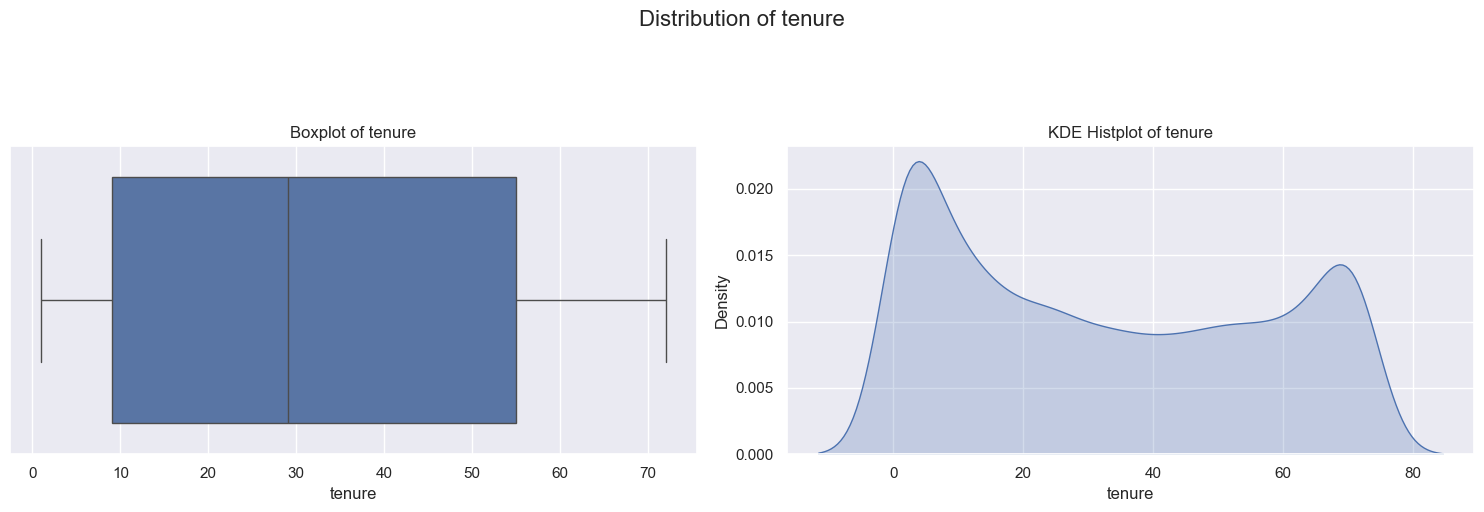

,count,mean,std,min,25%,50%,75%,max,IQR
tenure,7032.0,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0,46.0


P-value untuk kolom 'tenure': 0.00
Tolak Ho, terima Ha. Data 'tenure' tidak terdistribusi normal.


In [70]:
plot_box_and_kde(df, 'tenure')
check_normality(df,'tenure')

Kode menampilkan visualisasi sebaran data `tenure` (lama pelanggan berlangganan) menggunakan boxplot dan kurva distribusi (KDE). Selain itu, dihitung statistik deskriptif seperti rata-rata, median, dan rentang antar kuartil (IQR), serta dilakukan uji normalitas. Hasil uji menunjukkan bahwa data `tenure` tidak mengikuti distribusi normal (p-value = 0.0).

##### Business Insights
- Sebaran `tenure` menunjukkan dua puncak: banyak pelanggan berada pada masa langganan yang sangat pendek, dan banyak pula yang sudah lama berlangganan.
- Median berada di 29 bulan, dengan penyebaran data yang cukup lebar, menandakan variasi besar dalam durasi berlangganan antar pelanggan.
- Pola ini menunjukkan bahwa pelanggan memiliki perilaku berlangganan yang berbeda—beberapa berhenti dalam waktu singkat, sementara lainnya bertahan dalam jangka panjang.
- Distribusi yang tidak normal dan tidak merata dapat memengaruhi proses analisis dan pemodelan data.

##### Business Recommendations
- Hasil ini menunjukkan adanya dua kelompok pelanggan berdasarkan lama berlangganan, namun perlu dianalisis lebih lanjut apakah pola ini berbeda antara pelanggan yang churn dan yang tidak.
- Disarankan memberikan dukungan atau insentif tambahan kepada pelanggan baru agar meningkatkan peluang mereka bertahan lebih lama.
- Pelanggan lama perlu dipertahankan melalui program loyalitas atau layanan bernilai tambah.
- Model prediksi yang digunakan sebaiknya tidak mengasumsikan distribusi normal, seperti Random Forest atau Gradient Boosting, agar fitur `tenure` tetap efektif digunakan.


#### 2.5.2 Berapa besar total pengeluaran pelanggan selama mereka berlangganan?

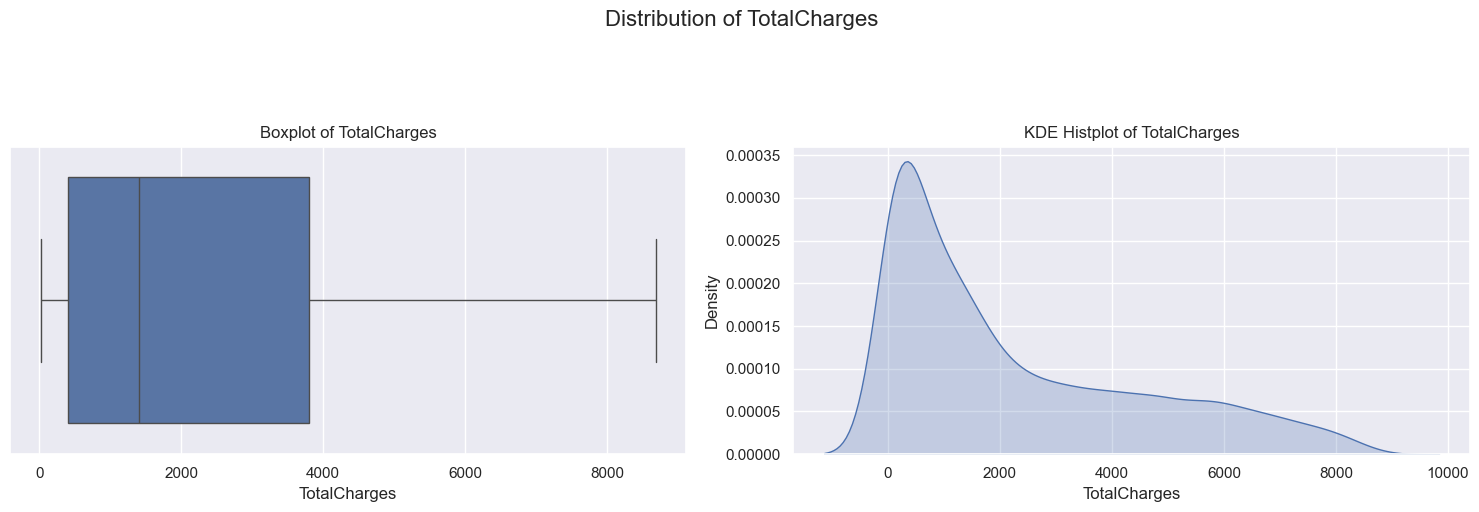

,count,mean,std,min,25%,50%,75%,max,IQR
TotalCharges,7032.0,2283.300441,2266.771362,18.8,401.45,1397.475,3794.7375,8684.8,3393.2875


P-value untuk kolom 'TotalCharges': 0.00
Tolak Ho, terima Ha. Data 'TotalCharges' tidak terdistribusi normal.


In [71]:
plot_box_and_kde(df, 'TotalCharges')
check_normality(df, 'TotalCharges')

Kode menampilkan visualisasi sebaran data `TotalCharges` (total pengeluaran pelanggan selama berlangganan) menggunakan boxplot dan kurva distribusi (KDE). Selain itu, dihitung statistik deskriptif seperti rata-rata, median, dan rentang antar kuartil (IQR), serta dilakukan uji normalitas. Hasil uji menunjukkan bahwa data `TotalCharges` tidak mengikuti distribusi normal (p-value ≈ 0.0).

##### Business Insights
- Sebaran `TotalCharges` condong ke kanan (right-skewed), menunjukkan lebih banyak pelanggan dengan total pengeluaran rendah dibanding yang tinggi.
- Median pengeluaran pelanggan berada di sekitar 1.397, yang berarti setengah dari pelanggan mengeluarkan kurang dari angka tersebut selama langganan.
- IQR sebesar 3.393 menunjukkan sebaran nilai pengeluaran yang cukup besar antar pelanggan.
- Pola ini mencerminkan bahwa mayoritas pelanggan belum mencapai total pengeluaran tinggi, kemungkinan karena masa langganan yang masih pendek atau penggunaan layanan yang terbatas.
- Distribusi yang tidak normal perlu diperhatikan dalam analisis statistik dan pemodelan prediktif.

##### Business Recommendations
- Penting untuk memahami faktor-faktor yang menyebabkan sebagian besar pelanggan memiliki total pengeluaran yang relatif rendah.
- Perlu strategi untuk mendorong peningkatan nilai pelanggan jangka panjang, seperti melalui bundling layanan atau upselling.
- Kelompok pelanggan dengan total pengeluaran tinggi dapat dianalisis lebih lanjut untuk diidentifikasi karakteristik loyalitas atau nilai hidup pelanggan (CLV).
- Model prediktif yang digunakan sebaiknya tidak bergantung pada asumsi distribusi normal, agar fitur `TotalCharges` tetap optimal digunakan dalam analisis churn.

#### 2.5.3 Berapa biaya bulanan yang biasanya dibayarkan pelanggan?

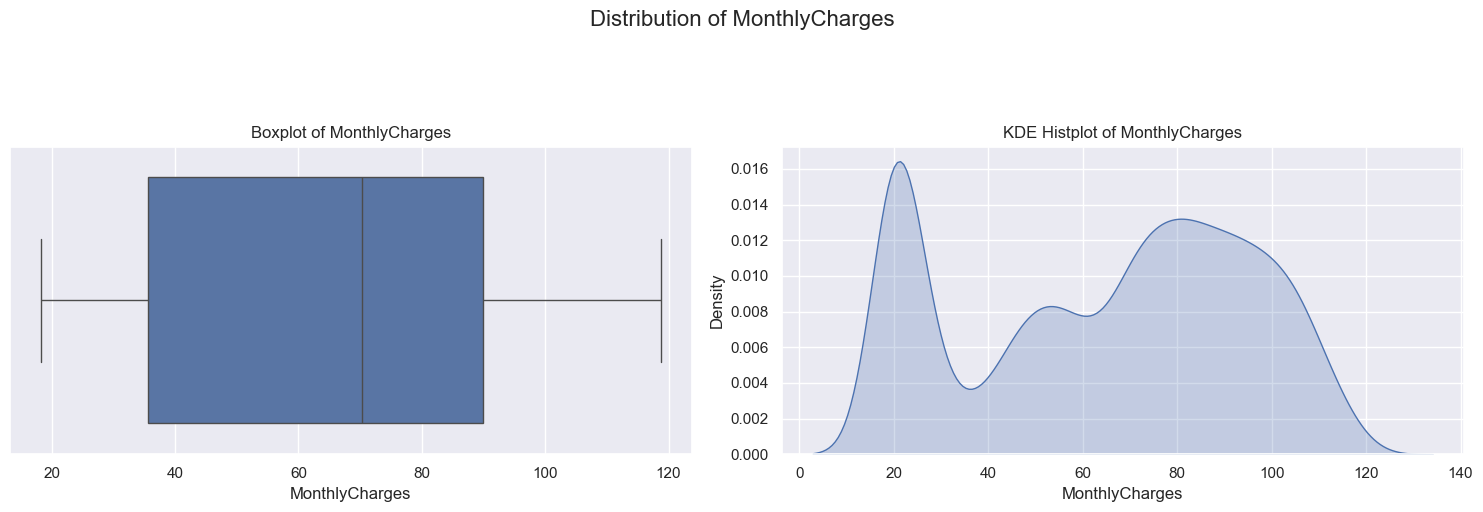

,count,mean,std,min,25%,50%,75%,max,IQR
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.35,89.8625,118.75,54.275


P-value untuk kolom 'MonthlyCharges': 0.00
Tolak Ho, terima Ha. Data 'MonthlyCharges' tidak terdistribusi normal.


In [72]:
plot_box_and_kde(df, 'MonthlyCharges')
check_normality(df, 'MonthlyCharges')

Kode menampilkan visualisasi sebaran data `MonthlyCharges` (biaya bulanan yang dibayarkan pelanggan) menggunakan boxplot dan kurva distribusi (KDE). Selain itu, dihitung statistik deskriptif seperti rata-rata, median, dan rentang antar kuartil (IQR), serta dilakukan uji normalitas. Hasil uji menunjukkan bahwa data `MonthlyCharges` tidak mengikuti distribusi normal (p-value = 0.0).

##### Business Insights
- Sebaran `MonthlyCharges` tidak simetris dan menunjukkan beberapa puncak (multimodal), yang mengindikasikan keberagaman jenis layanan atau paket yang diambil pelanggan.
- Median biaya bulanan pelanggan adalah sekitar 70.35, sedikit di atas rata-rata sebesar 64.8.
- IQR sebesar 54.275 menunjukkan variasi biaya bulanan yang cukup besar antar pelanggan.
- Pola ini dapat mencerminkan perbedaan dalam penggunaan layanan tambahan, paket bundling, atau segmentasi produk yang tersedia.
- Distribusi yang tidak normal dan tidak seragam penting untuk diperhatikan dalam analisis lanjutan.

##### Business Recommendations
- Perlu pemahaman lebih dalam mengenai kelompok-kelompok biaya bulanan yang muncul, dan hubungannya dengan jenis layanan yang diambil.
- Strategi pemasaran dapat diarahkan berdasarkan segmentasi biaya bulanan, misalnya dengan menawarkan upgrade bagi pelanggan dengan biaya rendah.
- Pelanggan dengan biaya tinggi berpotensi sebagai segmen bernilai tinggi yang perlu dijaga loyalitasnya.
- Disarankan menggunakan model prediksi yang tidak mengasumsikan distribusi normal agar fitur `MonthlyCharges` tetap efektif dalam analisis churn atau segmentasi.


#### 2.5.4 Bagaimana distribusi status churn pelanggan?

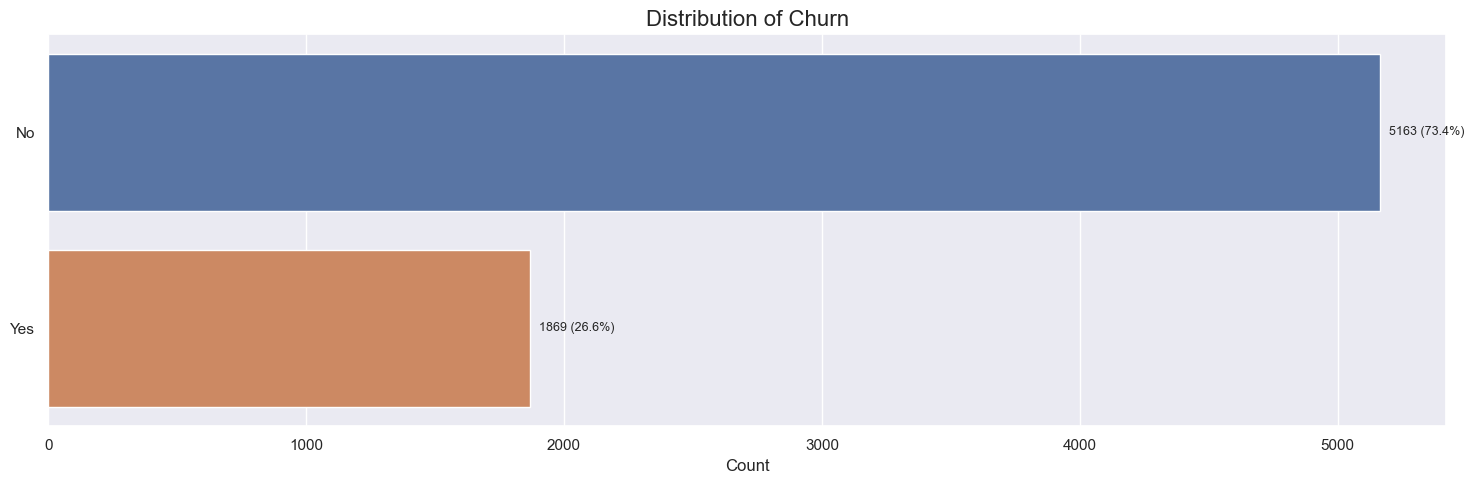

In [73]:
plot_countplot_with_hue(df, 'Churn')

#### 2.5.5 Bagaimana karakteristik distribusi pelanggan berdasarkan jenis kelamin?

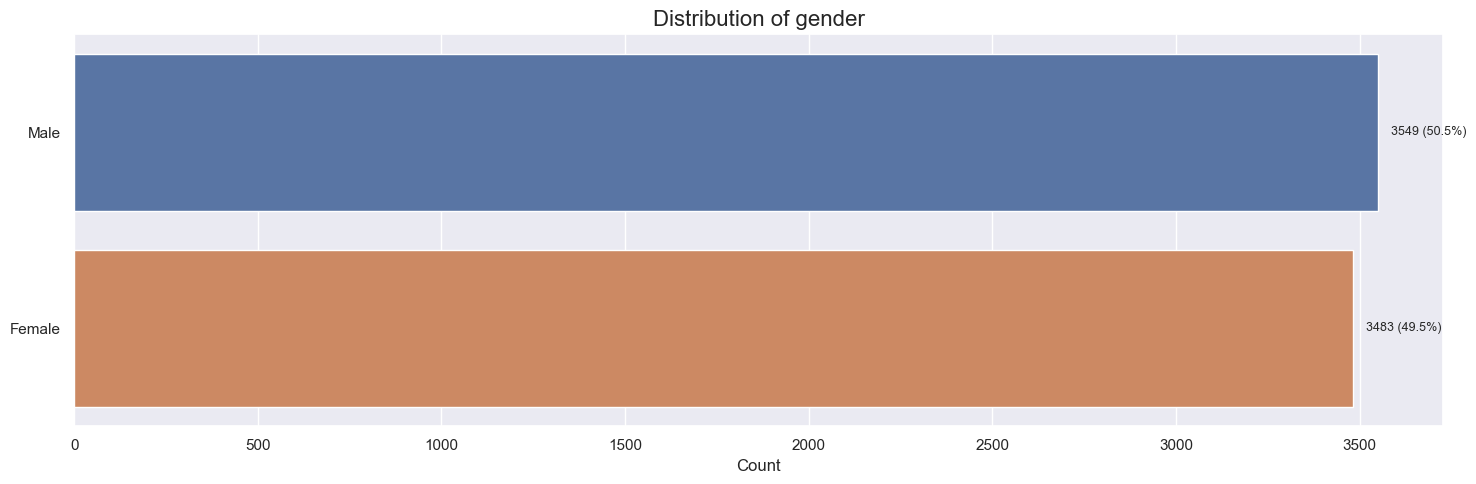

In [74]:
plot_countplot_with_hue(df, 'gender')

#### 2.5.6 Bagaimana karakteristik distribusi pelanggan berdasarkan status lansia?

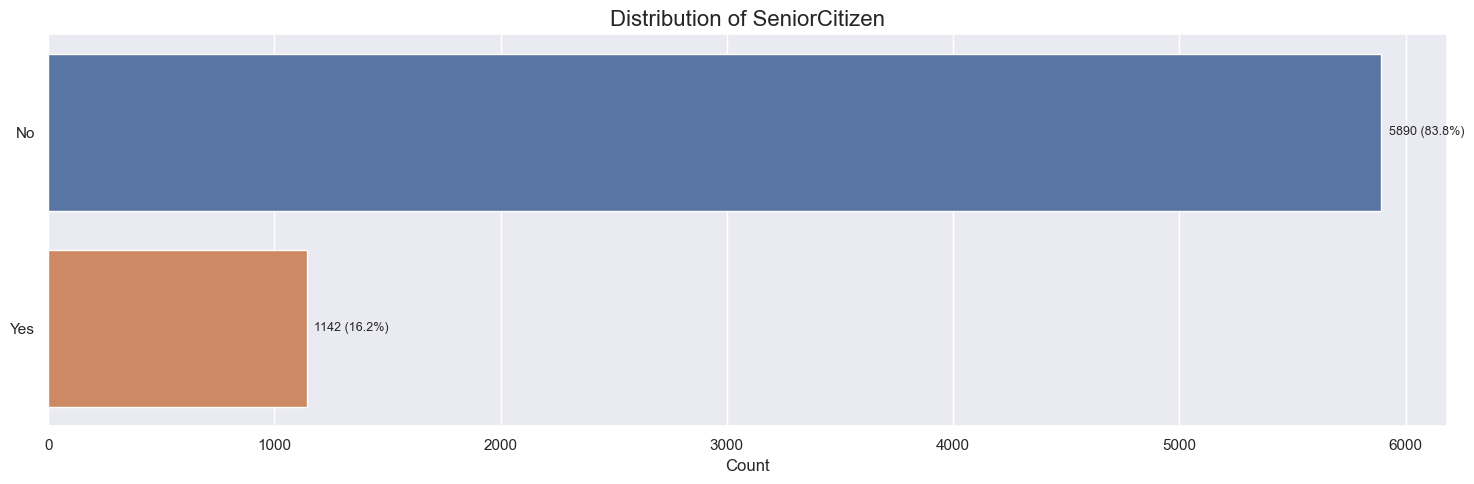

In [75]:
plot_countplot_with_hue(df, 'SeniorCitizen')

#### 2.5.7 Bagaimana karakteristik distribusi pelanggan berdasarkan status memiliki pasangan?

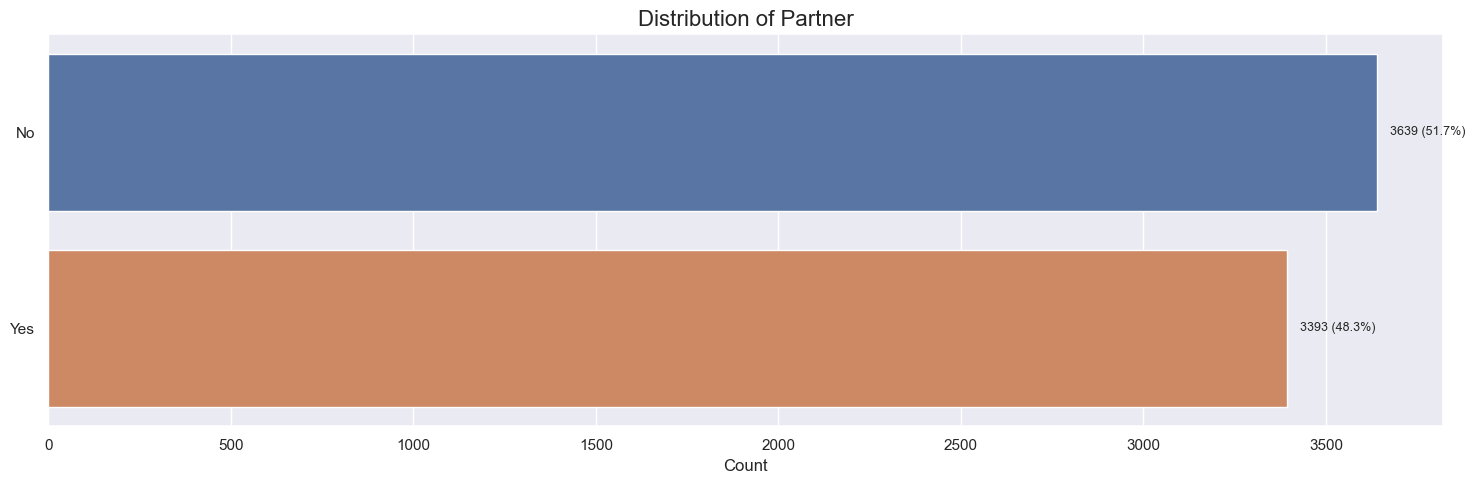

In [76]:
plot_countplot_with_hue(df, 'Partner')

#### 2.5.8 Bagaimana karakteristik distribusi pelanggan berdasarkan tanggungan keluarga?

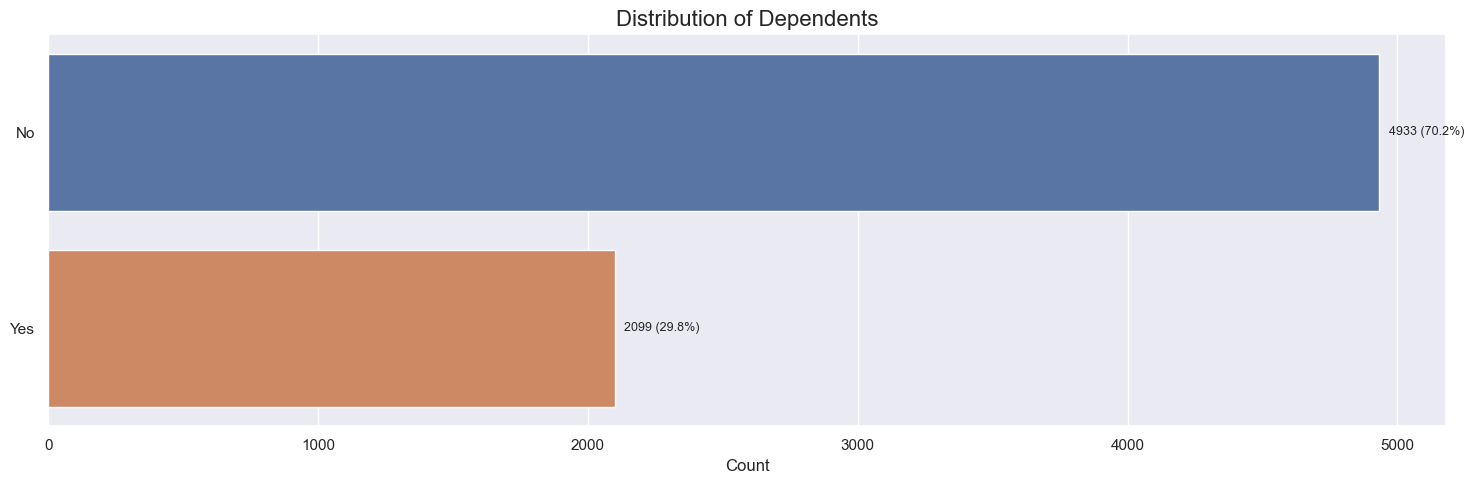

In [77]:
plot_countplot_with_hue(df, 'Dependents')

#### 2.5.9 Bagaimana karakteristik distribusi pelanggan berdasarkan kepemilikan layanan telepon ?

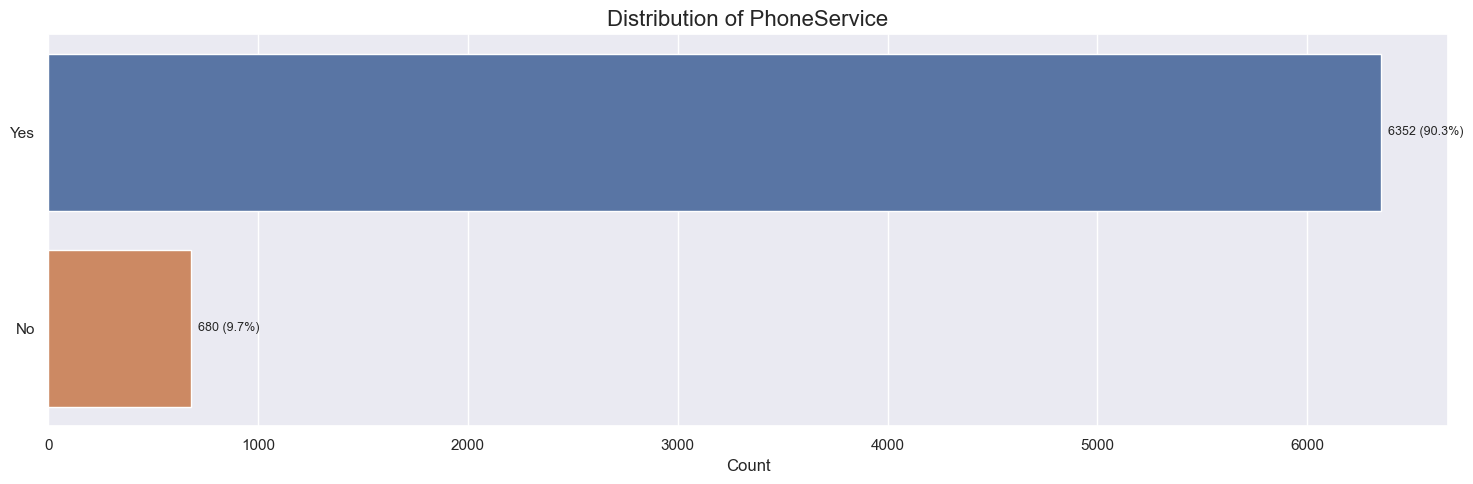

In [78]:
plot_countplot_with_hue(df, 'PhoneService')

#### 2.5.10 Bagaimana karakteristik distribusi pelanggan berdasarkan kepemilikan beberapa saluran telepon?

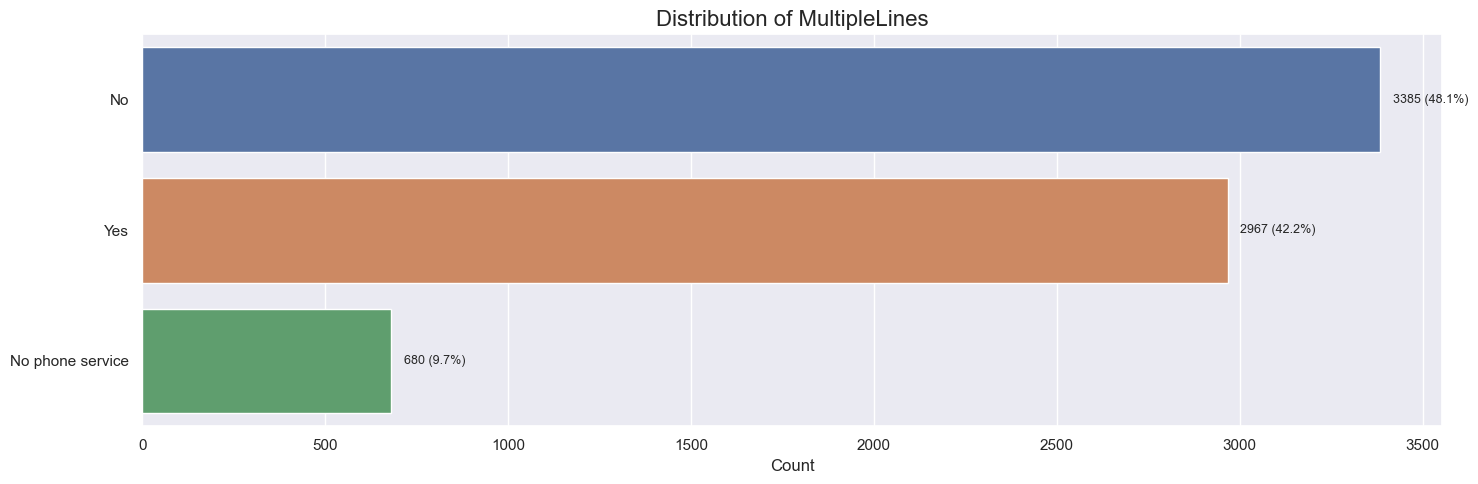

In [79]:
plot_countplot_with_hue(df, 'MultipleLines')

#### 2.5.11 Bagaimana karakteristik distribusi pelanggan berdasarkan jenis layanan internet?

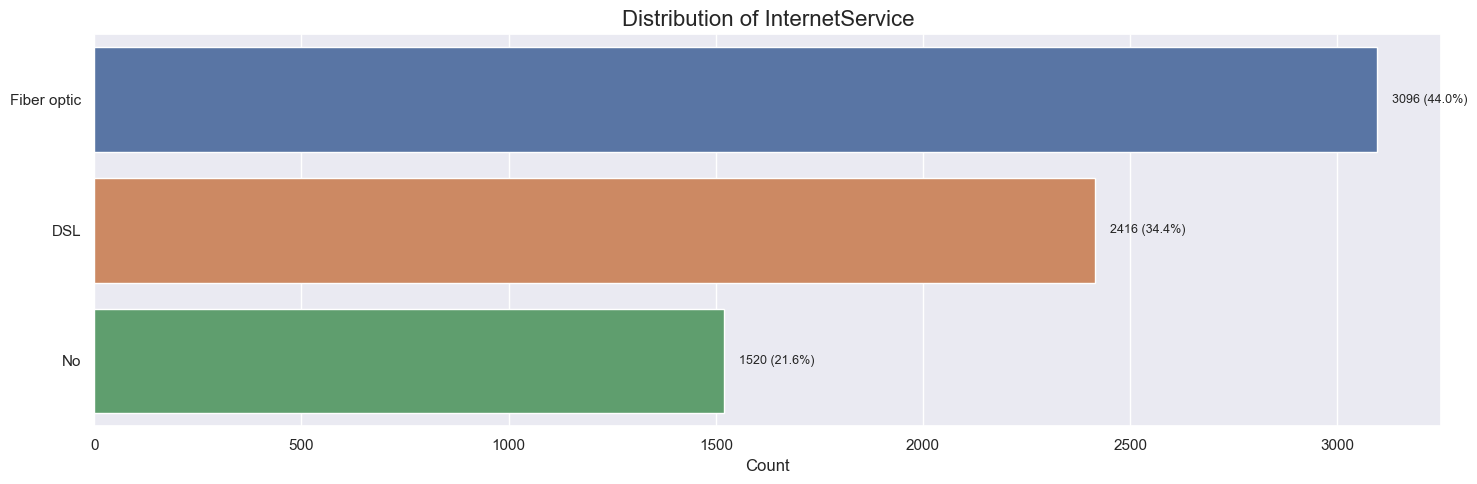

In [80]:
plot_countplot_with_hue(df, 'InternetService')

#### 2.5.12 Bagaimana karakteristik distribusi pelanggan berdasarkan status perlindungan keamanan online?

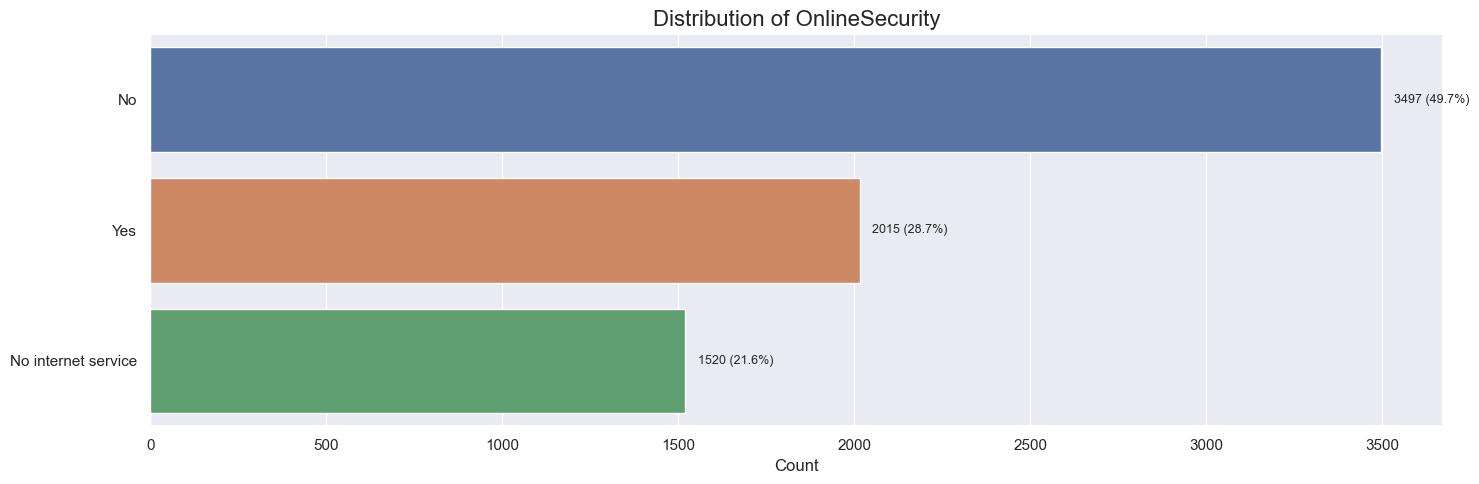

In [81]:
plot_countplot_with_hue(df, 'OnlineSecurity')

#### 2.5.13 Bagaimana karakteristik distribusi pelanggan berdasarkan status cadangan data online?

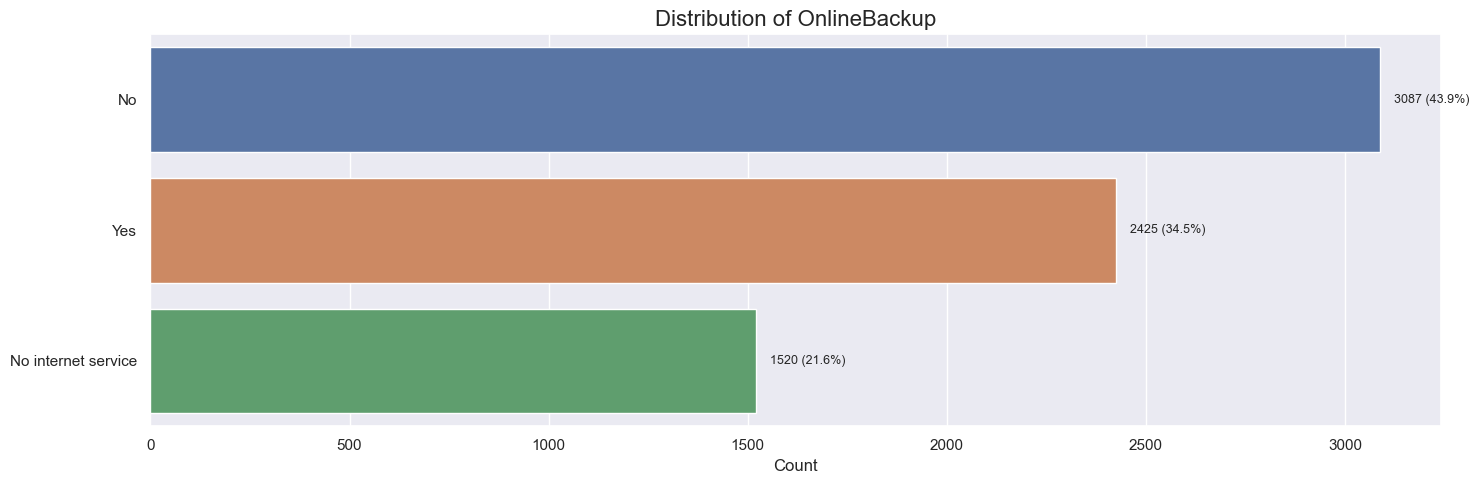

In [82]:
plot_countplot_with_hue(df, 'OnlineBackup')

#### 2.5.14 Bagaimana karakteristik distribusi pelanggan berdasarkan perlindungan perangkat?

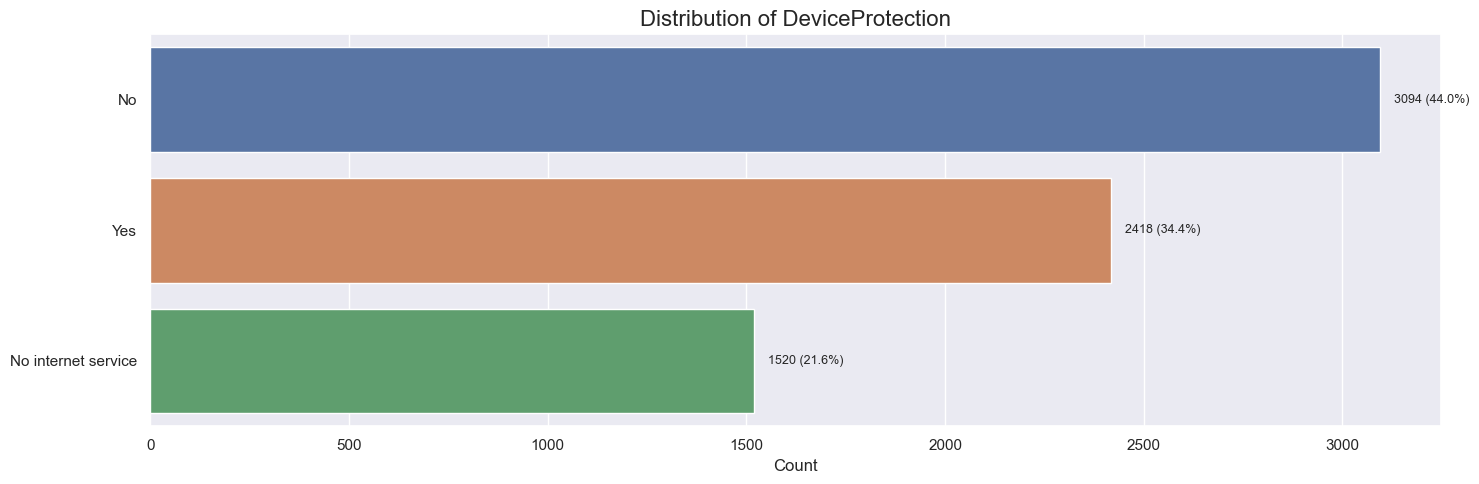

In [83]:
plot_countplot_with_hue(df, 'DeviceProtection')

#### 2.5.15 Bagaimana karakteristik distribusi pelanggan berdasarkan dukungan teknis?

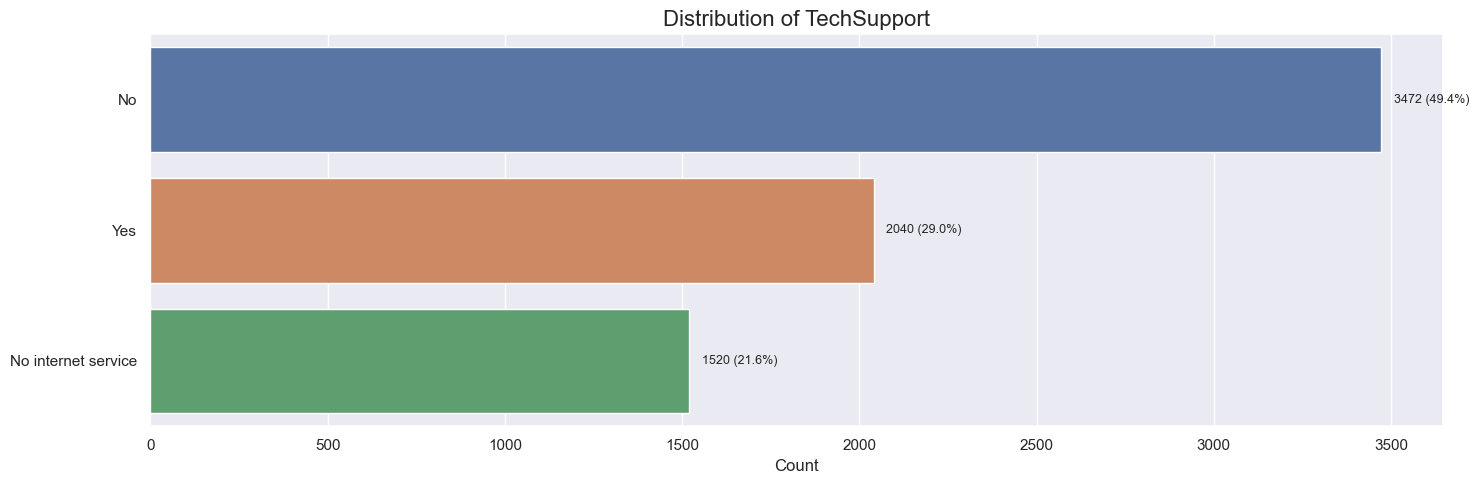

In [84]:
plot_countplot_with_hue(df, 'TechSupport')

#### 2.5.16 Bagaimana karakteristik distribusi pelanggan berdasarkan layanan streaming TV?

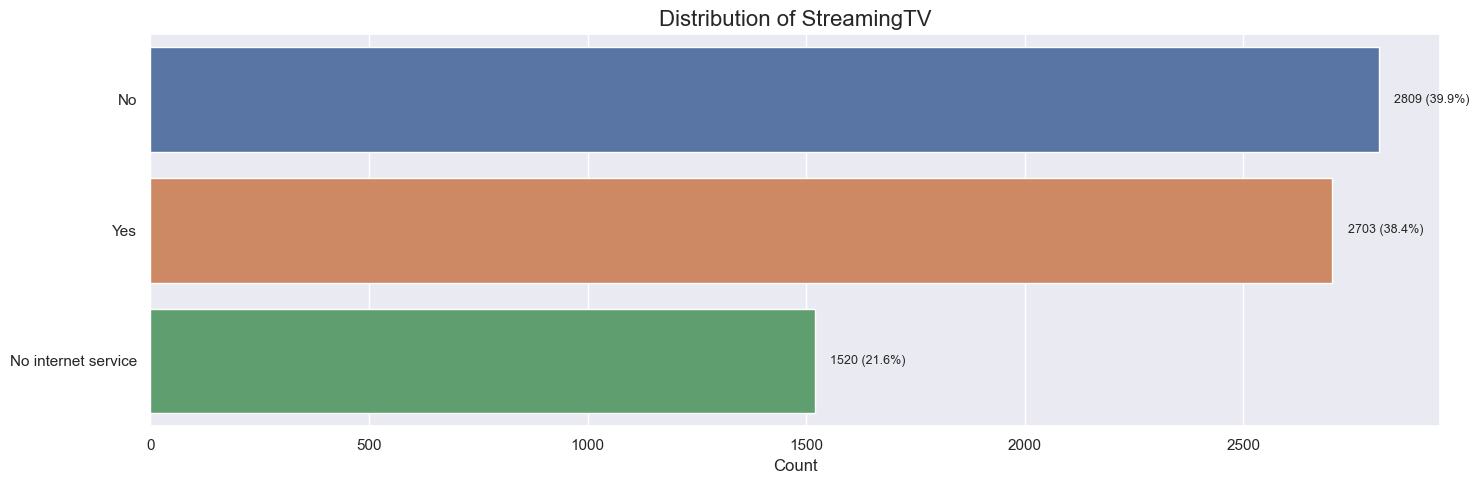

In [85]:
plot_countplot_with_hue(df, 'StreamingTV')

#### 2.5.17 Bagaimana karakteristik distribusi pelanggan berdasarkan layanan streaming film?


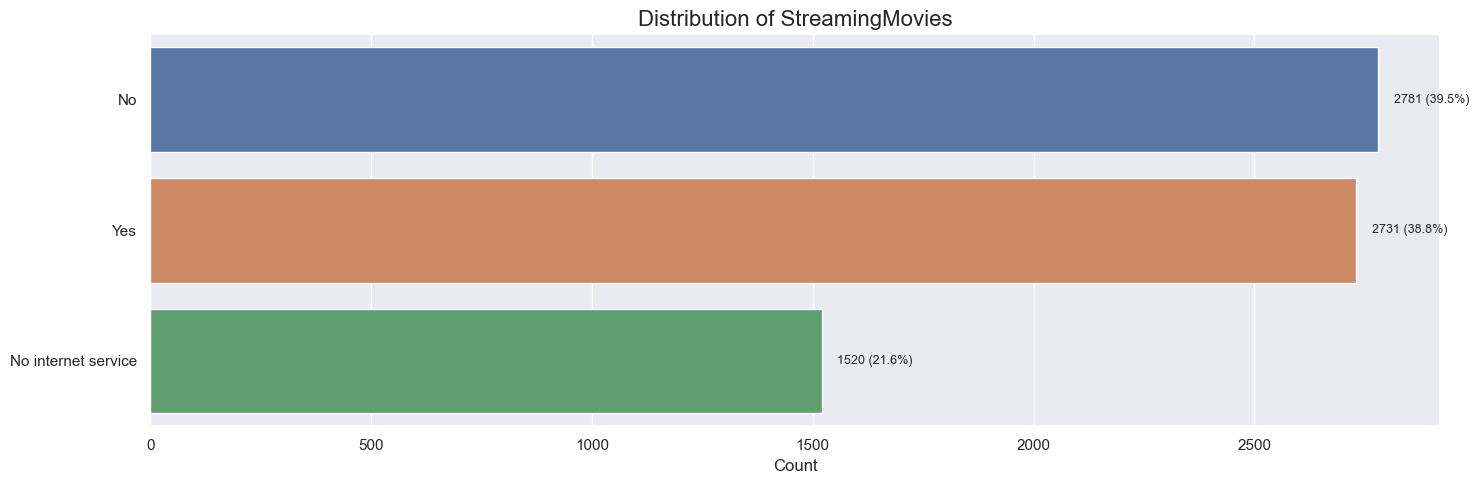

In [86]:
plot_countplot_with_hue(df, 'StreamingMovies')

#### 2.5.18 Bagaimana karakteristik distribusi pelanggan berdasarkan jenis kontrak langganan?


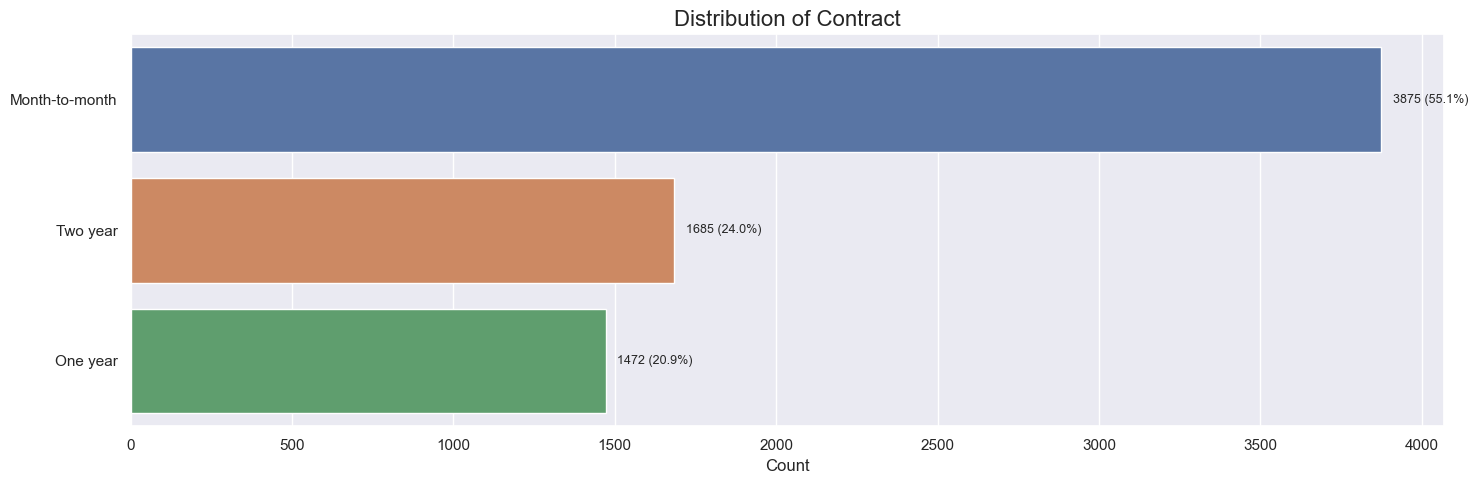

In [87]:
plot_countplot_with_hue(df, 'Contract')

#### 2.5.19 Bagaimana karakteristik distribusi pelanggan berdasarkan metode paperless?

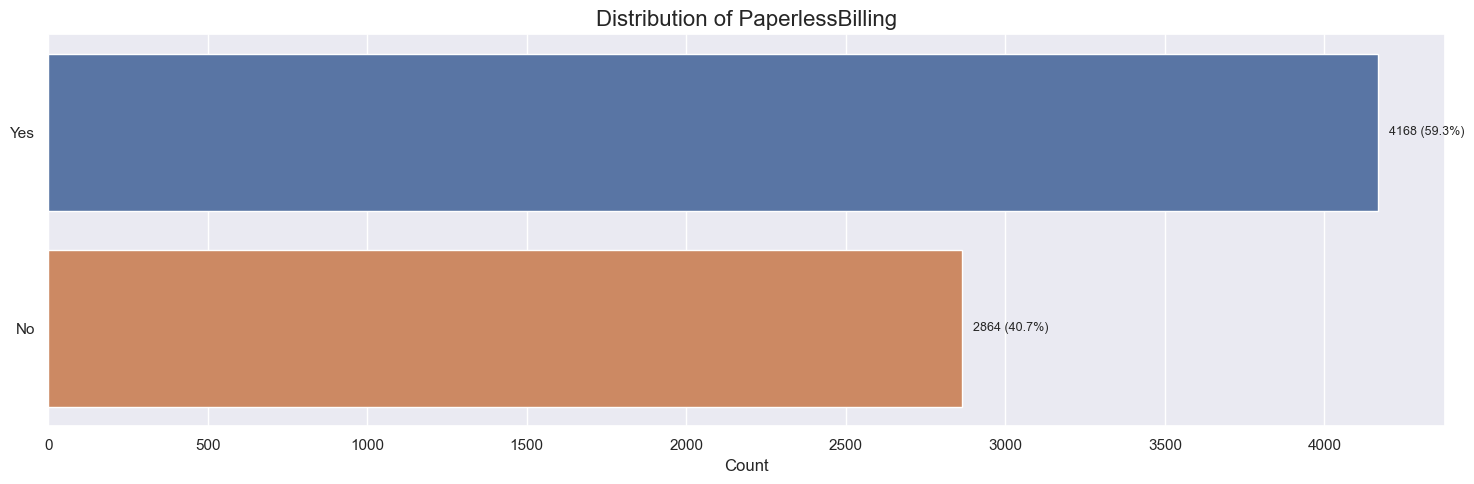

In [88]:
plot_countplot_with_hue(df, 'PaperlessBilling')

#### 2.5.20 Bagaimana karakteristik distribusi pelanggan berdasarkan metode pembayaran?


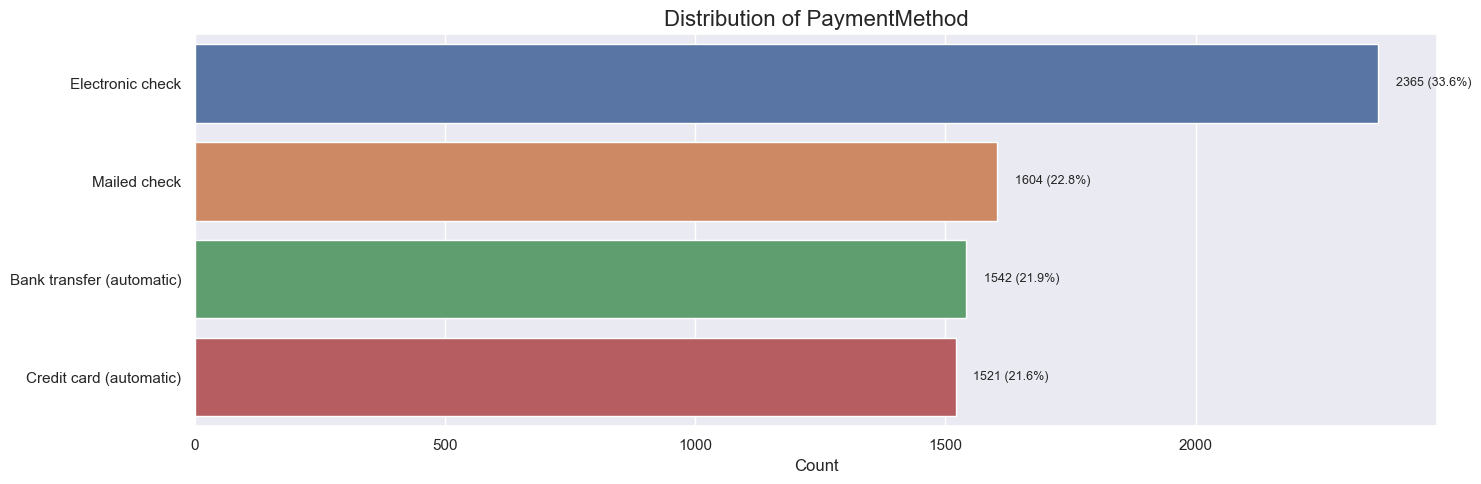

In [89]:
plot_countplot_with_hue(df, 'PaymentMethod')

### 2.6 Exploratory Data Analysis (EDA) - Bivariat

In [90]:
def plot_box_and_kde_churn(df, col, target='Churn', figsize=(15, 6)):
    # Visualisasi
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    plt.suptitle(f'Distribution of {col} Based on {target}', fontsize=16, y=1.02)

    # Boxplot berdasarkan Churn
    # Menggunakan y=target untuk membuat boxplot terpisah untuk setiap kategori Churn
    sns.boxplot(data=df, x=col, y=target, orient='h', ax=axes[0], hue=target)
    axes[0].set_title(f'Boxplot of {col}')

    # KDE plot berdasarkan Churn
    # Menggunakan hue=target untuk membuat kurva distribusi terpisah
    sns.kdeplot(data=df, x=col, hue=target, fill=True, common_norm=False, alpha=0.5, ax=axes[1])
    axes[1].set_title(f'Distribution of {col}')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Statistik deskriptif yang dikelompokkan berdasarkan Churn
    stats = df.groupby(target)[col].describe()
    q1 = stats['25%']
    q3 = stats['75%']
    iqr = q3 - q1
    stats['IQR'] = iqr

    # Tampilkan tabel statistik
    display(stats)

Fungsi `plot_box_and_kde_churn` digunakan untuk menganalisis distribusi variabel numerik berdasarkan kategori target seperti 'Churn'. Fungsi ini menghasilkan dua visualisasi berdampingan: boxplot horizontal yang memisahkan data berdasarkan nilai target untuk mengamati sebaran dan potensi outlier, serta KDE plot (Kernel Density Estimate) untuk melihat pola distribusi tiap kategori secara halus. Selain visualisasi, fungsi ini menghitung dan menampilkan tabel statistik deskriptif (count, mean, std, min, kuartil, dan IQR) yang dikelompokkan berdasarkan nilai target, sehingga mempermudah perbandingan karakteristik numerik antar kategori.


In [91]:
def plot_stacked_barh_churn(df, col, target='Churn', figsize=(15, 5)):
    # Hitung count & percentage
    counts = df.groupby([col, target], observed=True).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100

    # Pastikan kolom urut: No, Yes
    desired_order = ['No', 'Yes']
    actual_order = [c for c in desired_order if c in percentages.columns]
    counts = counts[actual_order]
    percentages = percentages[actual_order]

    # Ascending True
    sort_order = percentages['No'].sort_values(ascending=True).index
    counts = counts.loc[sort_order]
    percentages = percentages.loc[sort_order]

    # Visualisasi manual
    fig, ax = plt.subplots(figsize=figsize)
    left = [0] * len(percentages)

    for status in actual_order:
        values = percentages[status]
        bar = ax.barh(percentages.index, values, left=left, label=status)

        for i, (pct, cnt) in enumerate(zip(values, counts[status])):
            if pct > 0:
                ax.text(left[i] + pct / 2, i, f'{pct:.1f}%\n({cnt})',
                        ha='center', va='center', fontsize=8,
                        color='white' if pct > 15 else 'black')
        left = [l + v for l, v in zip(left, values)]

    plt.suptitle(f'Distribution of {col} Based on {target}', fontsize=16, y=1.02)
    ax.set_xlabel('Percentage')
    ax.set_ylabel('')
    ax.legend(title=target, loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()
    plt.show()

Fungsi `plot_stacked_barh_churn` digunakan untuk memvisualisasikan distribusi variabel kategorikal berdasarkan target seperti 'Churn' dalam bentuk stacked bar chart horizontal. Fungsi ini menghitung jumlah dan persentase tiap kategori target dalam setiap kelas variabel, lalu mengurutkan data berdasarkan persentase kategori 'No' secara menaik. Visualisasi menampilkan batang tersegmentasi untuk masing-masing kategori target, disertai anotasi berupa persentase dan jumlah absolut untuk mempermudah interpretasi. Fungsi ini sangat berguna untuk membandingkan proporsi churn antar kategori dan mengidentifikasi kelompok dengan tingkat churn tinggi.


In [92]:
def plot_scatter_with_reg(df, x, y, hue='Churn', figsize=(10, 8)):
    plt.figure(figsize=figsize)
    sns.scatterplot(data=df, x=x, y=y, hue=hue, alpha=0.6)
    sns.regplot(data=df, x=x, y=y, scatter=False, color='red')
    plt.title(f'Relationship of {x} and {y}', fontsize=14)
    plt.tight_layout()
    plt.show()

Fungsi `plot_scatter_with_reg` digunakan untuk memvisualisasikan hubungan antara dua variabel numerik dengan tambahan segmentasi berdasarkan kategori target seperti 'Churn'. Fungsi ini menampilkan scatter plot berwarna berdasarkan kategori target untuk mengamati pola penyebaran data, serta menambahkan garis regresi berwarna merah sebagai representasi tren umum hubungan antara kedua variabel. Visualisasi ini bermanfaat untuk mengevaluasi korelasi dan mengidentifikasi potensi perbedaan pola antar segmen churn.


In [93]:
from scipy.stats import mannwhitneyu

def mannwhitney_test(df, col, target='Churn'):
    # Pastikan hanya ada dua kategori pada target
    categories = df[target].dropna().unique()
    if len(categories) != 2:
        raise ValueError(f"Kolom target '{target}' harus memiliki tepat 2 kategori (misal: 'Yes' dan 'No').")

    # Ambil data dari masing-masing grup
    group1 = df[df[target] == categories[0]][col].dropna()
    group2 = df[df[target] == categories[1]][col].dropna()

    # Uji Mann-Whitney U dua arah
    stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

    # Tampilkan hasil
    print(f"P-value untuk uji Mann-Whitney U antara '{categories[0]}' dan '{categories[1]}' pada kolom '{col}': {p_value:.4f}")
    if p_value < 0.05:
        print(f"Tolak Ho, terima Ha. Terdapat perbedaan signifikan antara grup '{categories[0]}' dan '{categories[1]}' untuk '{col}'.")
    else:
        print(f"Gagal tolak Ho. Tidak terdapat perbedaan signifikan antara grup '{categories[0]}' dan '{categories[1]}' untuk '{col}'.")


Fungsi ini bertujuan untuk menguji apakah terdapat perbedaan yang signifikan secara statistik antara dua kelompok pada kolom numerik tertentu berdasarkan kategori target seperti 'Churn'. Ia menggunakan uji non-parametrik Mann-Whitney U, yang cocok digunakan saat data tidak diasumsikan berdistribusi normal. Fungsi ini membandingkan distribusi nilai antara dua grup (misalnya 'Yes' dan 'No'), menghasilkan nilai p-value, dan memberikan interpretasi apakah hipotesis nol dapat ditolak atau tidak.
- Ho: Tidak ada perbedaan signifikan antara kedua grup.
- Ha: Terdapat perbedaan signifikan antara kedua grup.


#### 2.6.1 Apakah terdapat perbedaan lama pelanggan berlangganan antara yang churn dan tidak churn?

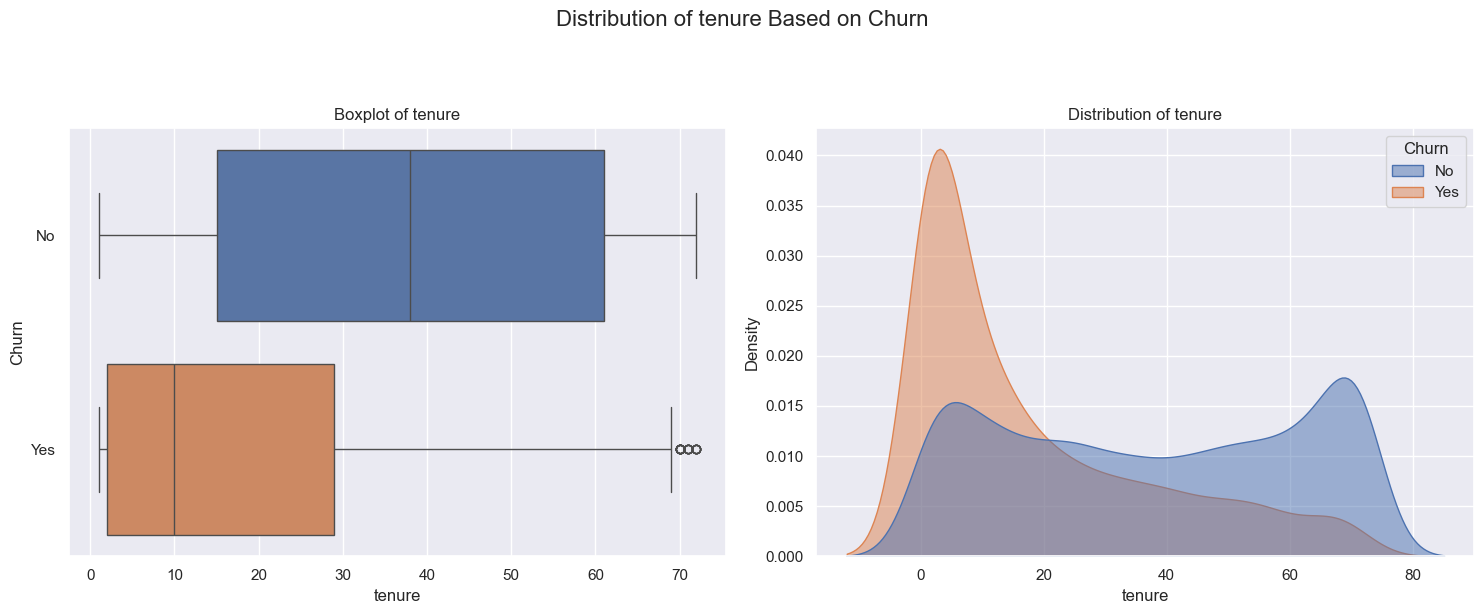

,count,mean,std,min,25%,50%,75%,max,IQR
Churn,,,,,,,,,
No,5163.0,37.650010,24.076940,1.0,15.0,38.0,61.0,72.0,46.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0,27.0


P-value untuk uji Mann-Whitney U antara 'No' dan 'Yes' pada kolom 'tenure': 0.0000
Tolak Ho, terima Ha. Terdapat perbedaan signifikan antara grup 'No' dan 'Yes' untuk 'tenure'.


In [94]:
plot_box_and_kde_churn(df, 'tenure')
mannwhitney_test(df, 'tenure')

Kode menampilkan visualisasi sebaran data `tenure` berdasarkan status `Churn` menggunakan boxplot dan kurva distribusi (KDE). Selain itu, dihitung statistik deskriptif terpisah antara pelanggan yang churn dan tidak churn. Uji statistik Mann-Whitney U dilakukan karena data tidak berdistribusi normal. Hasil uji menunjukkan bahwa terdapat perbedaan signifikan antara kedua kelompok (p-value = 0.0000).

##### Business Insights
- Pelanggan yang churn memiliki nilai `tenure` jauh lebih rendah dibandingkan yang tidak churn (median: 10 vs 38).
- Rata-rata tenure pelanggan yang churn adalah sekitar 18 bulan, sedangkan yang tidak churn mencapai hampir 38 bulan.
- IQR pelanggan churn lebih sempit (27 bulan) dibandingkan pelanggan yang tidak churn (46 bulan), menandakan bahwa sebagian besar pelanggan churn terjadi pada fase awal langganan.
- Distribusi KDE menunjukkan bahwa churn paling banyak terjadi pada pelanggan dengan masa berlangganan sangat pendek.
- Hasil ini memperkuat bahwa `tenure` adalah salah satu indikator penting dalam perilaku churn.

##### Business Recommendations
- Fokuskan upaya retensi pada pelanggan baru, khususnya dalam 1–12 bulan pertama, karena risiko churn paling tinggi pada periode ini.
- Implementasikan strategi onboarding yang kuat, edukasi produk, dan penawaran khusus pada masa awal langganan.
- Pelanggan dengan tenure tinggi (stabil) tetap perlu dijaga loyalitasnya melalui program loyalti atau peningkatan layanan.
- Fitur `tenure` dapat digunakan secara efektif dalam model prediksi churn karena memiliki kekuatan diskriminatif yang tinggi terhadap status churn.


#### 2.6.2 Apakah terdapat perbedaan total pengeluaran pelanggan antara yang churn dan tidak churn?


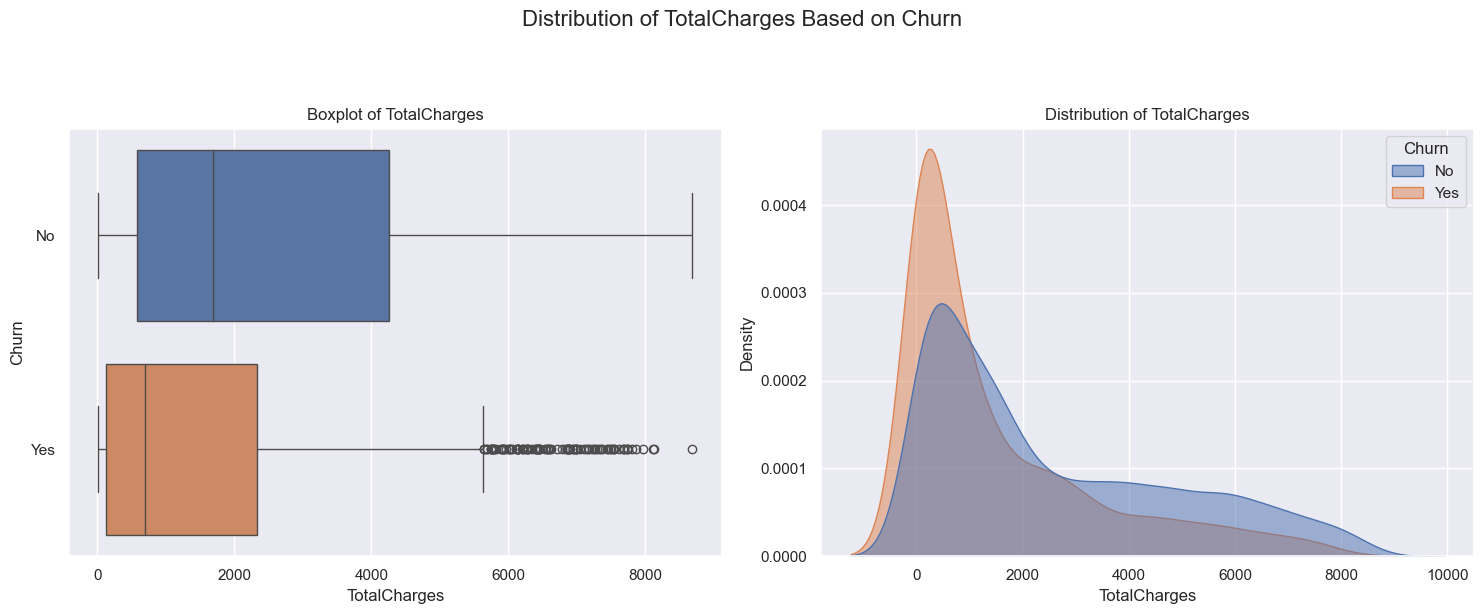

,count,mean,std,min,25%,50%,75%,max,IQR
Churn,,,,,,,,,
No,5163.0,2555.344141,2329.456984,18.80,577.825,1683.60,4264.125,8672.45,3686.3
Yes,1869.0,1531.796094,1890.822994,18.85,134.500,703.55,2331.300,8684.80,2196.8


P-value untuk uji Mann-Whitney U antara 'No' dan 'Yes' pada kolom 'TotalCharges': 0.0000
Tolak Ho, terima Ha. Terdapat perbedaan signifikan antara grup 'No' dan 'Yes' untuk 'TotalCharges'.


In [95]:
plot_box_and_kde_churn(df, 'TotalCharges')
mannwhitney_test(df, 'TotalCharges')

Kode menampilkan visualisasi sebaran data `TotalCharges` (total pengeluaran pelanggan) berdasarkan status `Churn` menggunakan boxplot dan kurva distribusi (KDE). Statistik deskriptif disajikan terpisah antara pelanggan churn dan tidak churn. Karena distribusi tidak normal, digunakan uji Mann-Whitney U, yang menunjukkan adanya perbedaan signifikan antara kedua kelompok (p-value = 0.0000).

##### Business Insights
- Pelanggan yang churn memiliki total pengeluaran yang jauh lebih rendah dibandingkan pelanggan yang tidak churn (median: 703 vs 1684).
- Rata-rata pengeluaran pelanggan churn sekitar 1.531, sedangkan yang tidak churn mencapai 2.555.
- IQR pelanggan churn (2.197) lebih sempit daripada pelanggan tidak churn (3.686), menunjukkan bahwa pelanggan yang churn umumnya belum mencapai total pembayaran tinggi.
- Distribusi KDE memperkuat bahwa pelanggan dengan total pengeluaran rendah lebih rentan untuk churn.
- Temuan ini menunjukkan bahwa pelanggan dengan lifetime value rendah cenderung tidak bertahan lama.

##### Business Recommendations
- Fokuskan retensi pada pelanggan dengan total pengeluaran rendah, karena mereka memiliki kecenderungan churn lebih tinggi.
- Identifikasi dan tangani hambatan atau pengalaman buruk yang membuat pelanggan berhenti sebelum mereka mencapai nilai pembayaran tinggi.
- Gunakan data `TotalCharges` sebagai indikator penting dalam model prediksi churn.
- Pelanggan dengan total pengeluaran tinggi berpotensi sebagai pelanggan loyal, dan dapat dijadikan target untuk program loyalitas atau promosi eksklusif.


#### 2.6.3 Apakah terdapat perbedaan biaya bulanan pelanggan antara yang churn dan tidak churn?


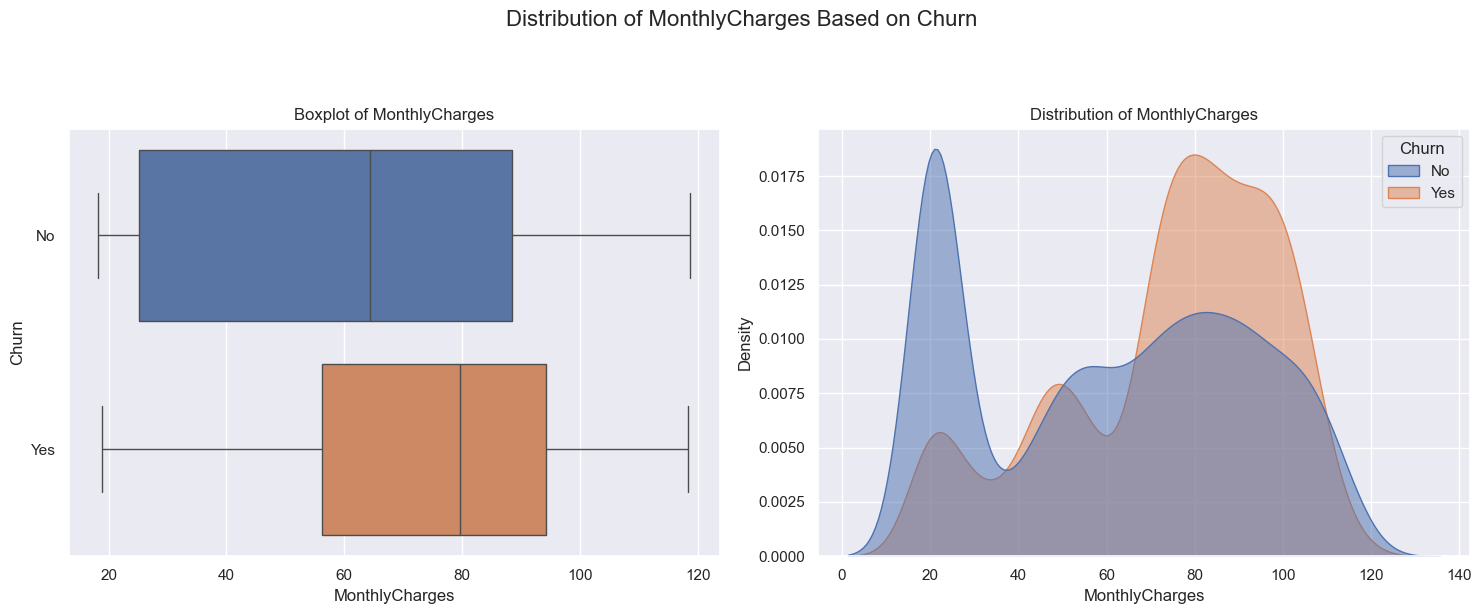

,count,mean,std,min,25%,50%,75%,max,IQR
Churn,,,,,,,,,
No,5163.0,61.307408,31.094557,18.25,25.10,64.45,88.475,118.75,63.375
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.65,94.200,118.35,38.050


P-value untuk uji Mann-Whitney U antara 'No' dan 'Yes' pada kolom 'MonthlyCharges': 0.0000
Tolak Ho, terima Ha. Terdapat perbedaan signifikan antara grup 'No' dan 'Yes' untuk 'MonthlyCharges'.


In [96]:
plot_box_and_kde_churn(df, 'MonthlyCharges')
mannwhitney_test(df, 'MonthlyCharges')

Kode menampilkan visualisasi sebaran data `MonthlyCharges` (biaya bulanan) berdasarkan status `Churn` menggunakan boxplot dan kurva distribusi (KDE). Statistik deskriptif disajikan untuk masing-masing kelompok. Karena distribusi data tidak normal, digunakan uji Mann-Whitney U, yang menunjukkan adanya perbedaan signifikan antara pelanggan churn dan tidak churn (p-value = 0.0000).

##### Business Insights
- Pelanggan yang churn memiliki rata-rata biaya bulanan lebih tinggi (74.4) dibandingkan pelanggan yang tidak churn (61.3).
- Median pelanggan churn juga lebih tinggi (79.7 vs 64.5), menunjukkan bahwa pelanggan dengan tagihan bulanan lebih tinggi cenderung lebih berisiko churn.
- IQR pelanggan churn (38.1) lebih sempit dibandingkan pelanggan tidak churn (63.4), mengindikasikan bahwa mayoritas pelanggan churn berada dalam kelompok tarif menengah hingga tinggi.
- Distribusi KDE memperkuat temuan bahwa churn lebih sering terjadi pada kelompok dengan biaya bulanan tinggi.
- Hal ini menunjukkan adanya kemungkinan ketidakpuasan atau ketidaksesuaian antara harga dan nilai layanan yang dirasakan.

##### Business Recommendations
- Lakukan evaluasi terhadap paket layanan dengan harga menengah hingga tinggi, terutama dalam hal nilai yang diterima pelanggan.
- Sediakan opsi downgrade, bundling, atau diskon untuk pelanggan yang menunjukkan tanda-tanda ketidakpuasan pada kelompok biaya tinggi.
- Perkuat layanan pelanggan dan komunikasi untuk pelanggan dengan biaya tinggi guna mengurangi potensi churn.
- Gunakan `MonthlyCharges` sebagai fitur penting dalam model prediksi churn dan dalam strategi pricing serta retensi.


#### 2.6.4 Apakah terdapat perbedaan tingkat churn antara pelanggan laki-laki dan perempuan?


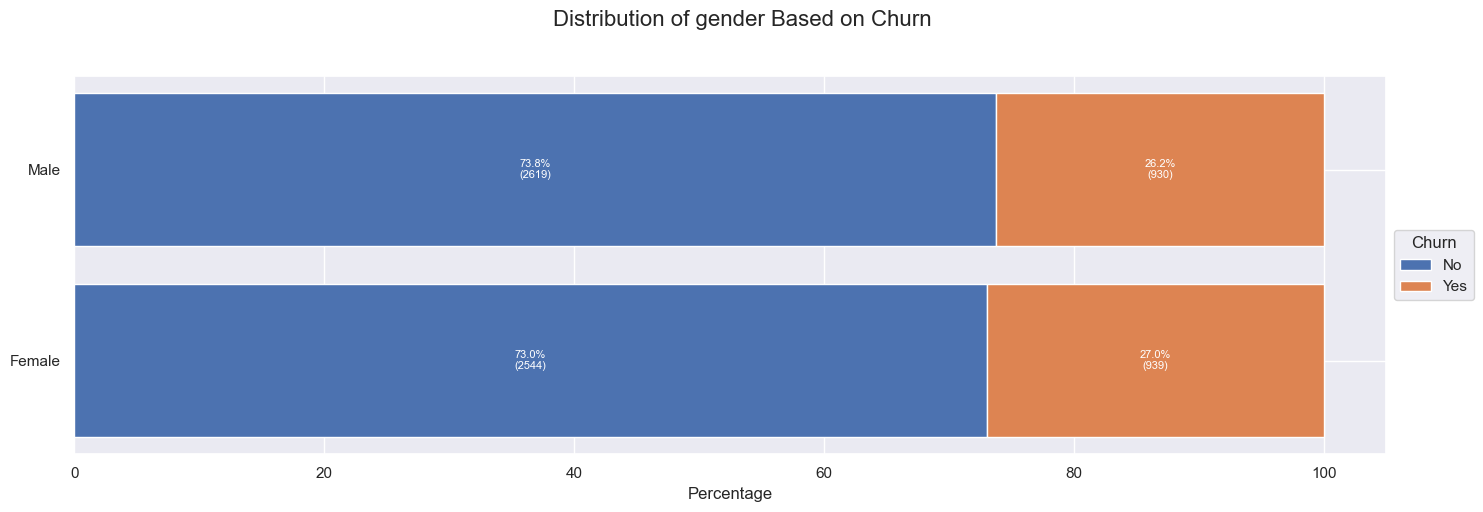

In [97]:
plot_stacked_barh_churn(df, 'gender')

#### 2.6.5 Apakah terdapat perbedaan tingkat churn antara pelanggan lansia dan non-lansia?


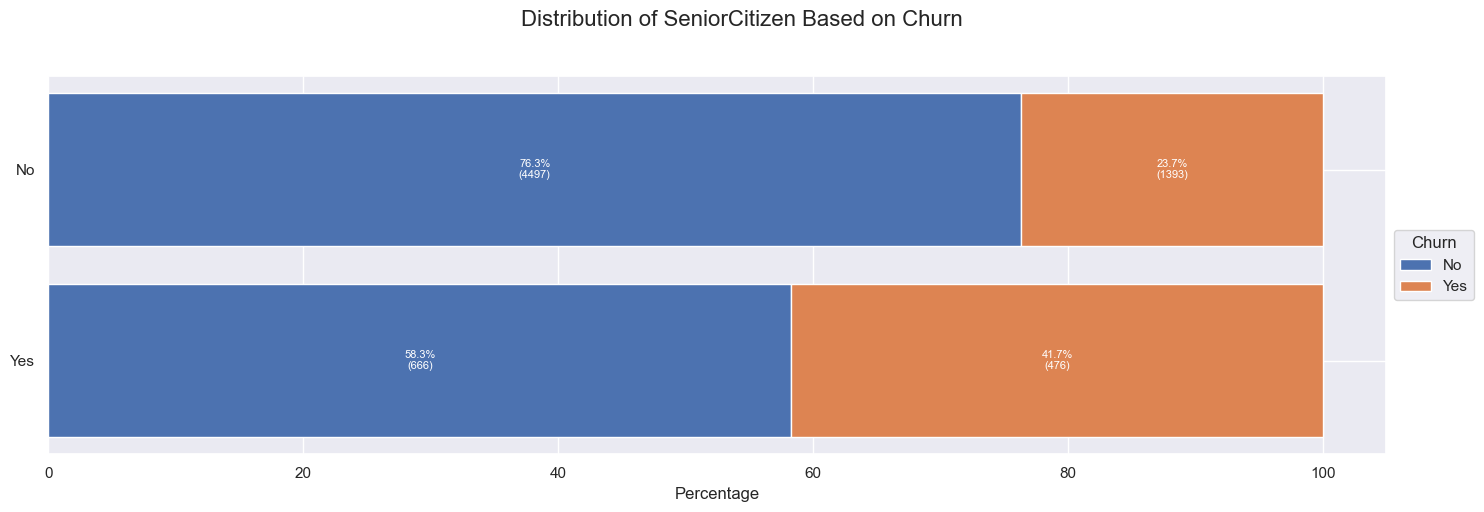

In [98]:
plot_stacked_barh_churn(df, 'SeniorCitizen')

#### 2.6.6 Apakah terdapat perbedaan tingkat churn antara pelanggan yang memiliki pasangan dan yang tidak?


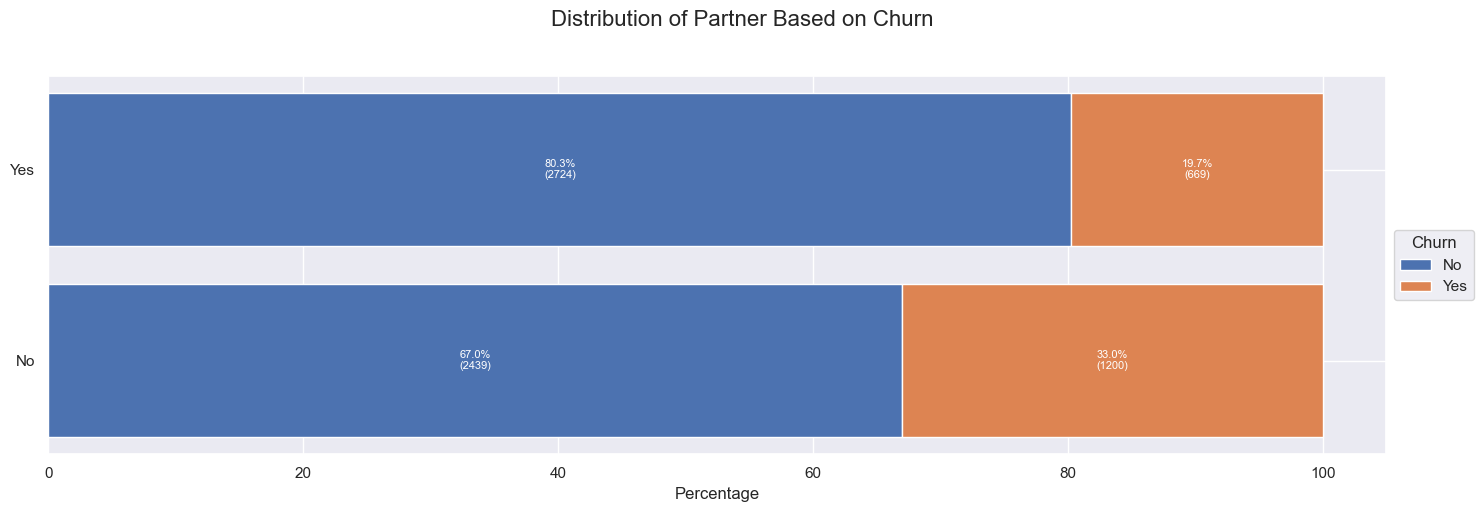

In [99]:
plot_stacked_barh_churn(df, 'Partner')

#### 2.6.7 Apakah terdapat perbedaan tingkat churn antara pelanggan yang memiliki tanggungan dan yang tidak?


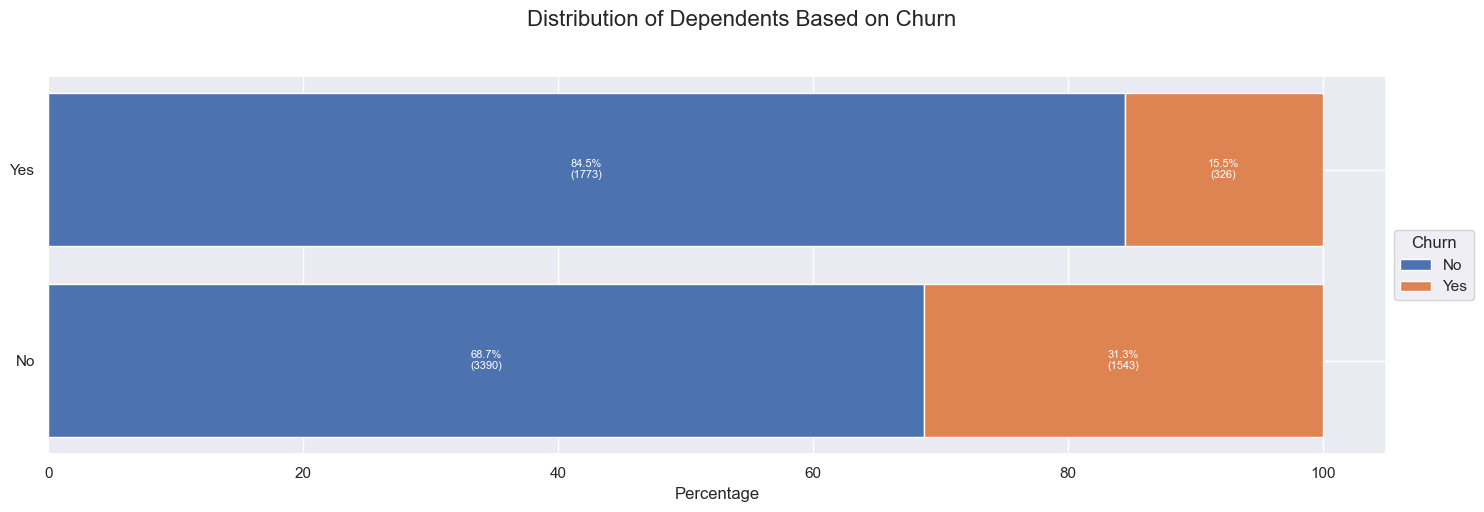

In [100]:
plot_stacked_barh_churn(df, 'Dependents')

#### 2.6.8 Apakah tingkat churn berbeda antara pelanggan yang menggunakan layanan telepon dan yang tidak?


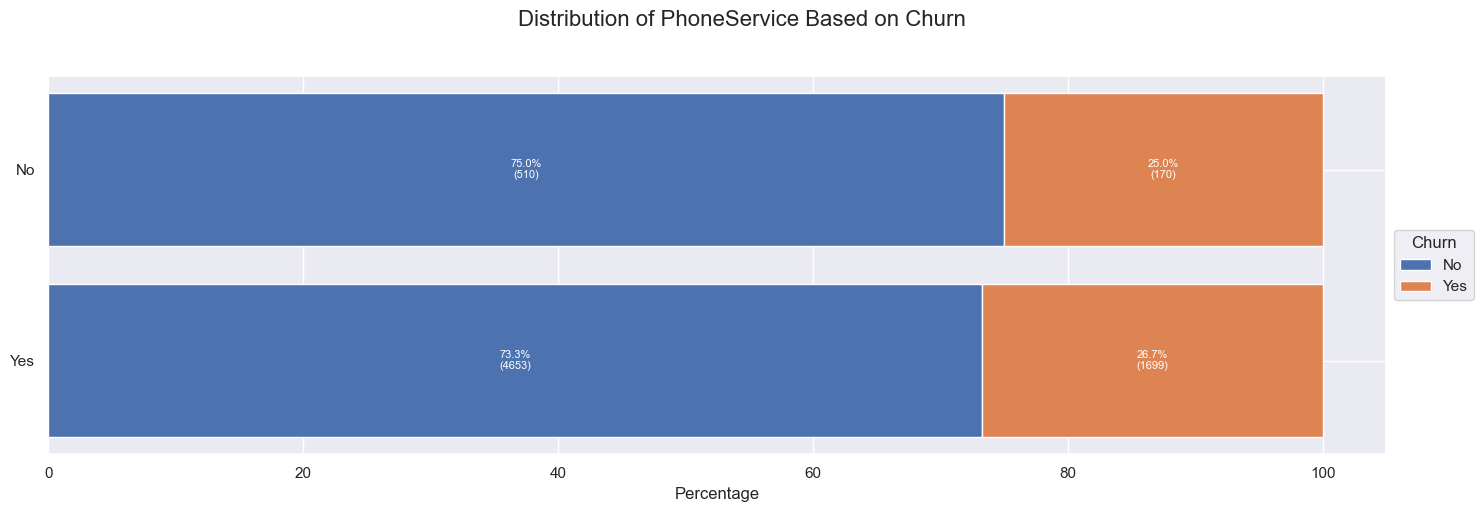

In [101]:
plot_stacked_barh_churn(df, 'PhoneService')

#### 2.6.9 Apakah tingkat churn berbeda antara pelanggan yang memiliki beberapa saluran telepon, satu saluran, atau tidak menggunakan layanan telepon?


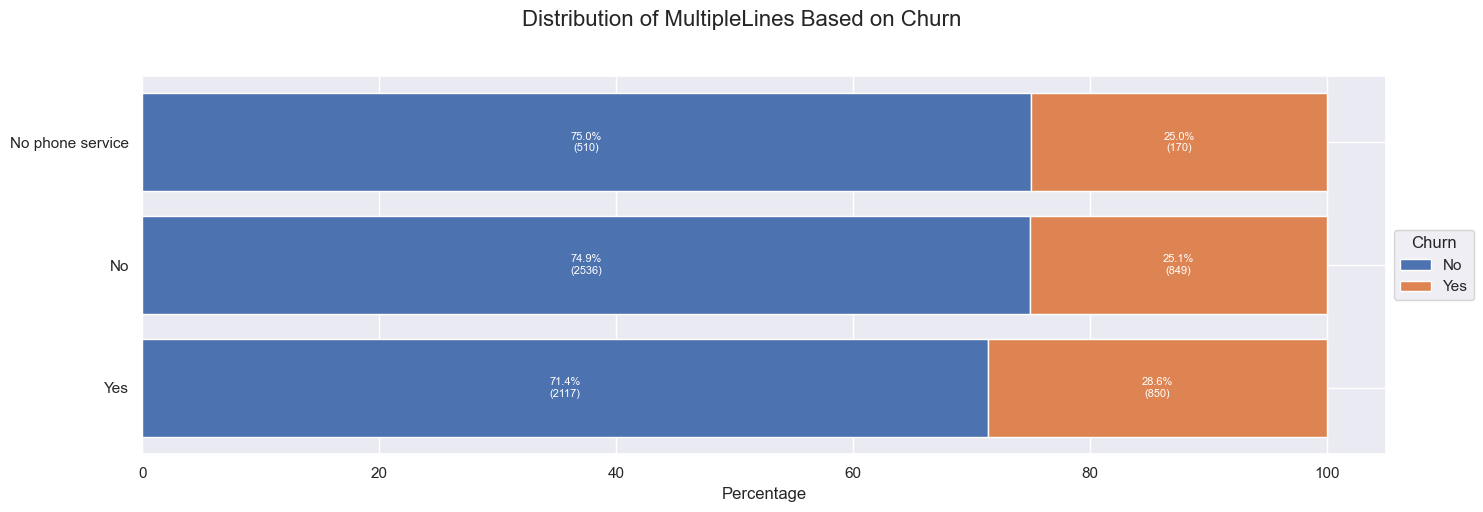

In [102]:
plot_stacked_barh_churn(df, 'MultipleLines')

#### 2.6.10 Apakah tingkat churn berbeda antara pelanggan yang menggunakan DSL, fiber optic, atau tidak menggunakan layanan internet?


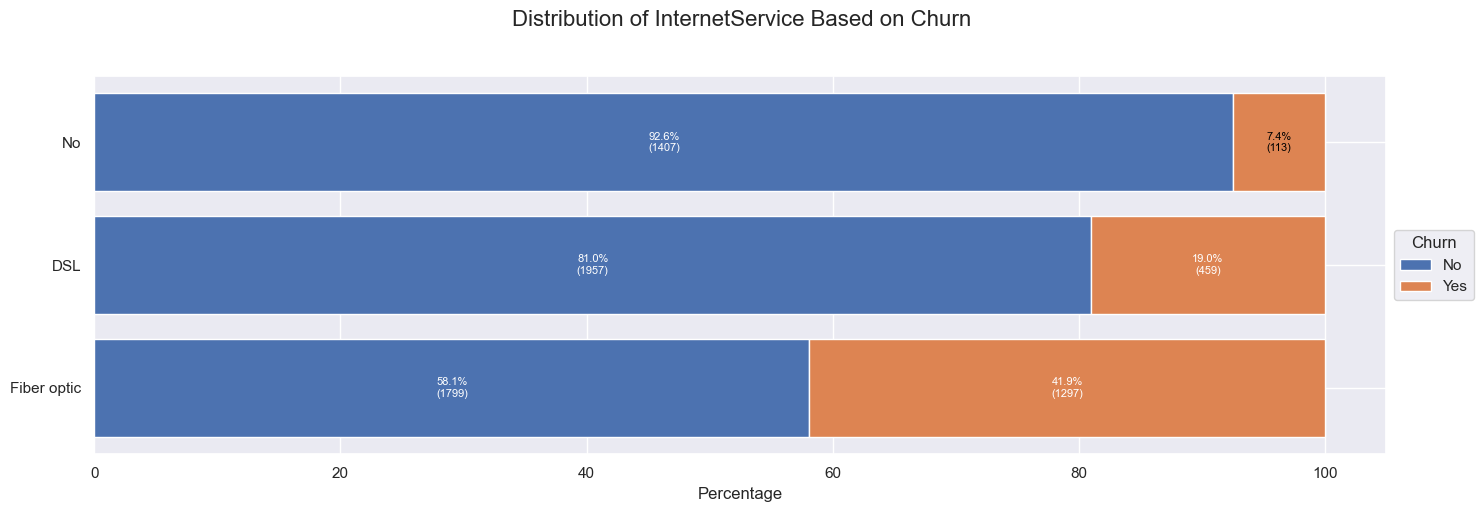

In [103]:
plot_stacked_barh_churn(df, 'InternetService')

#### 2.6.11 Apakah tingkat churn berbeda antara pelanggan yang menggunakan perlindungan keamanan online, tidak menggunakan, atau tidak memiliki layanan internet?


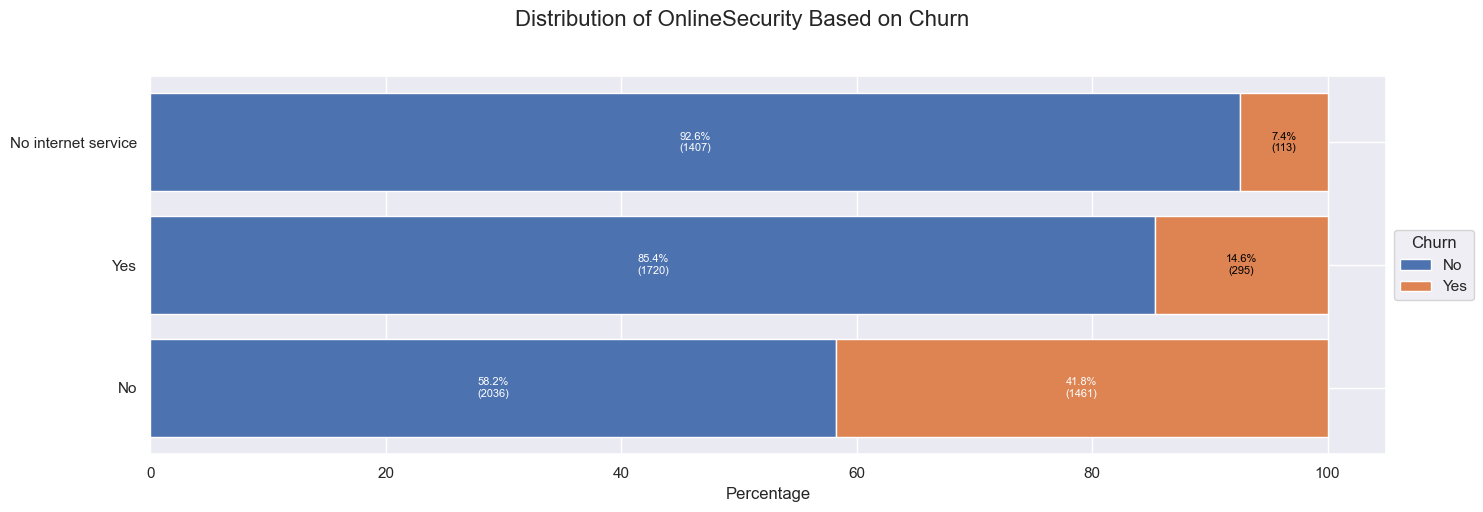

In [104]:
plot_stacked_barh_churn(df, 'OnlineSecurity')

#### 2.6.12 Apakah tingkat churn berbeda antara pelanggan yang menggunakan cadangan data online, tidak menggunakan, atau tidak memiliki layanan internet?


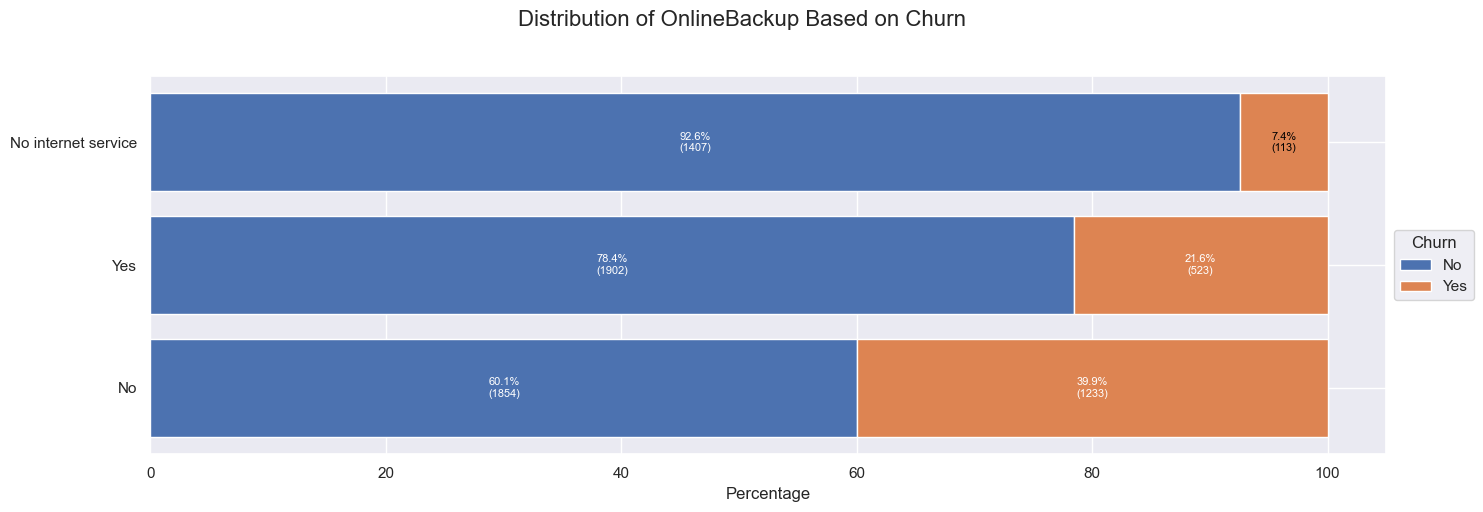

In [105]:
plot_stacked_barh_churn(df, 'OnlineBackup')

#### 2.6.13 Apakah tingkat churn berbeda antara pelanggan yang menggunakan perlindungan perangkat, tidak menggunakan, atau tidak memiliki layanan internet?


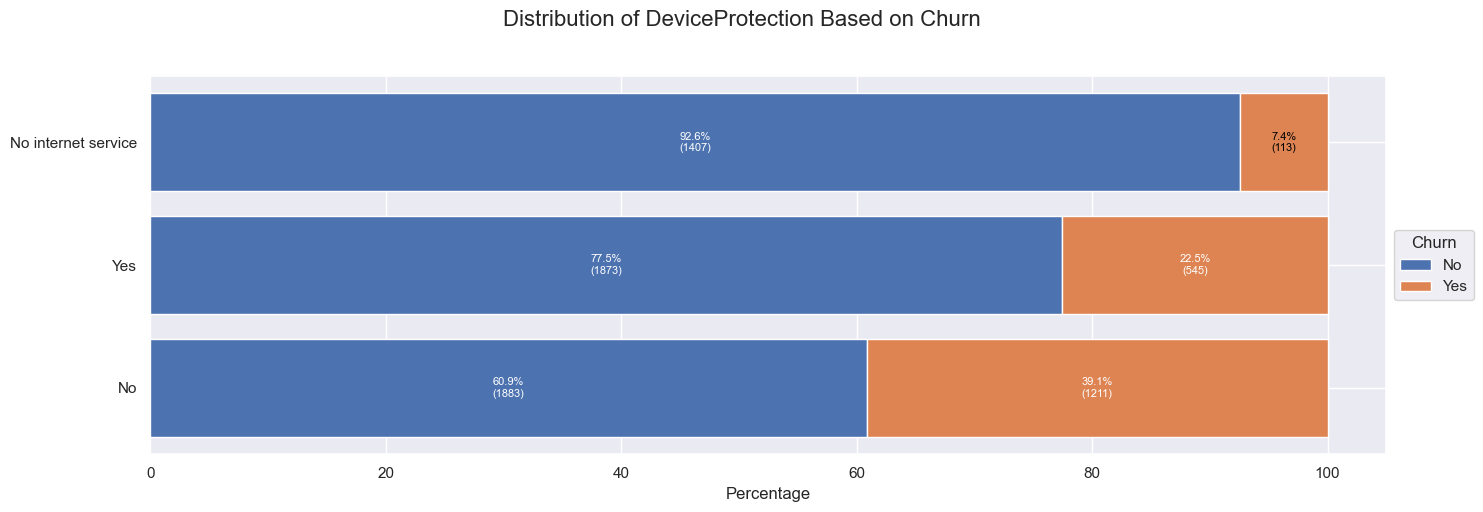

In [106]:
plot_stacked_barh_churn(df, 'DeviceProtection')

#### 2.6.14 Apakah tingkat churn berbeda antara pelanggan yang menggunakan dukungan teknis, tidak menggunakan, atau tidak memiliki layanan internet?


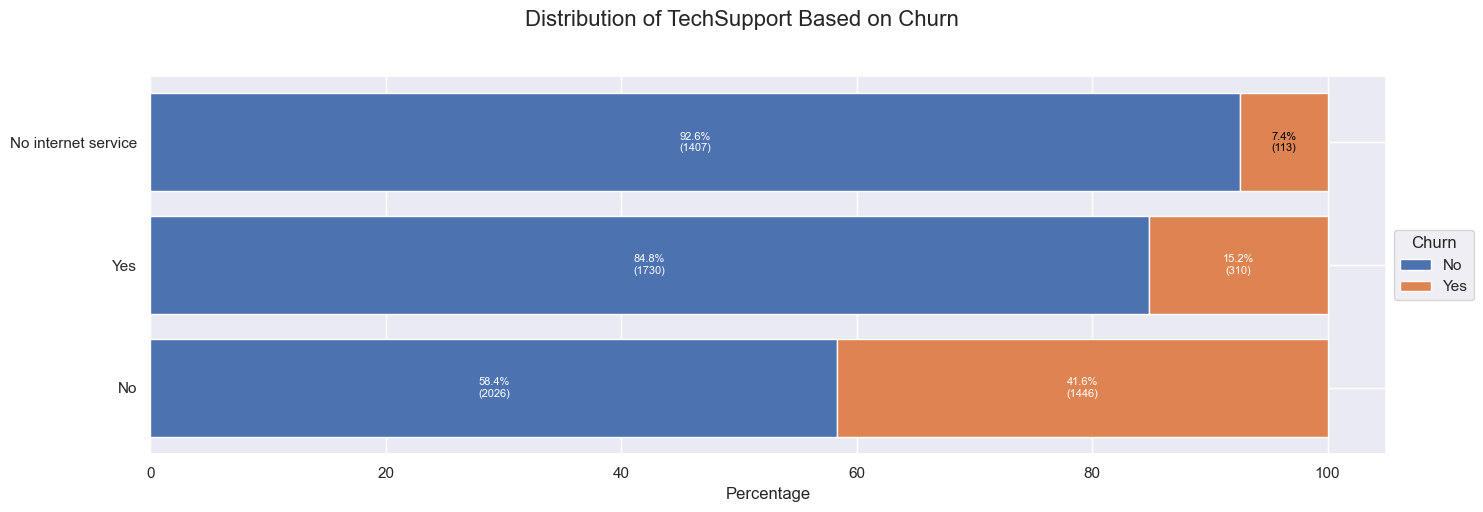

In [107]:
plot_stacked_barh_churn(df, 'TechSupport')

#### 2.6.15 Apakah tingkat churn berbeda antara pelanggan yang menggunakan layanan streaming TV, tidak menggunakan, atau tidak memiliki layanan internet?


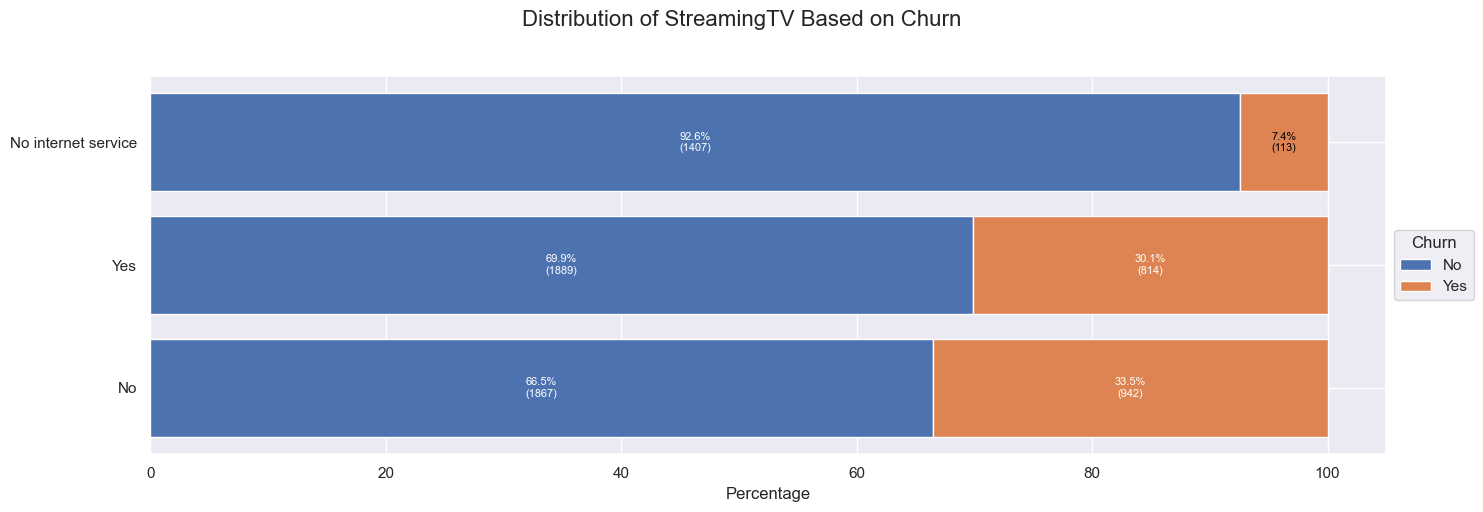

In [108]:
plot_stacked_barh_churn(df, 'StreamingTV')

#### 2.6.16 Apakah tingkat churn berbeda antara pelanggan yang menggunakan layanan streaming film, tidak menggunakan, atau tidak memiliki layanan internet?


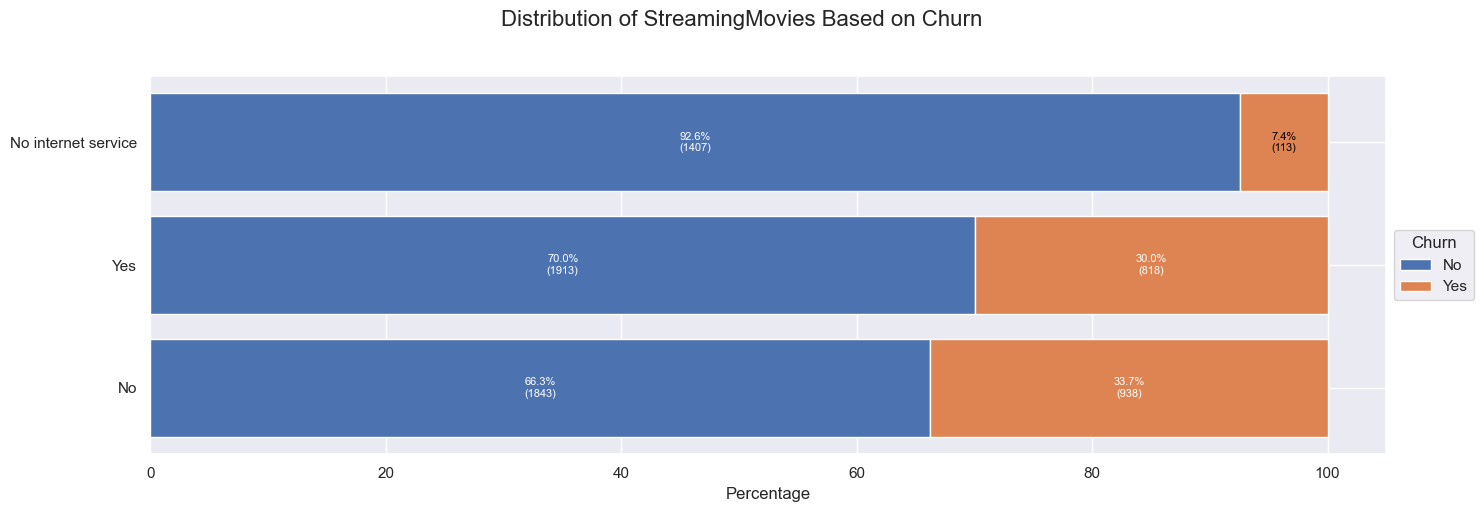

In [109]:
plot_stacked_barh_churn(df, 'StreamingMovies')

#### 2.6.17 Apakah tingkat churn berbeda berdasarkan jenis kontrak langganan yang dipilih pelanggan?


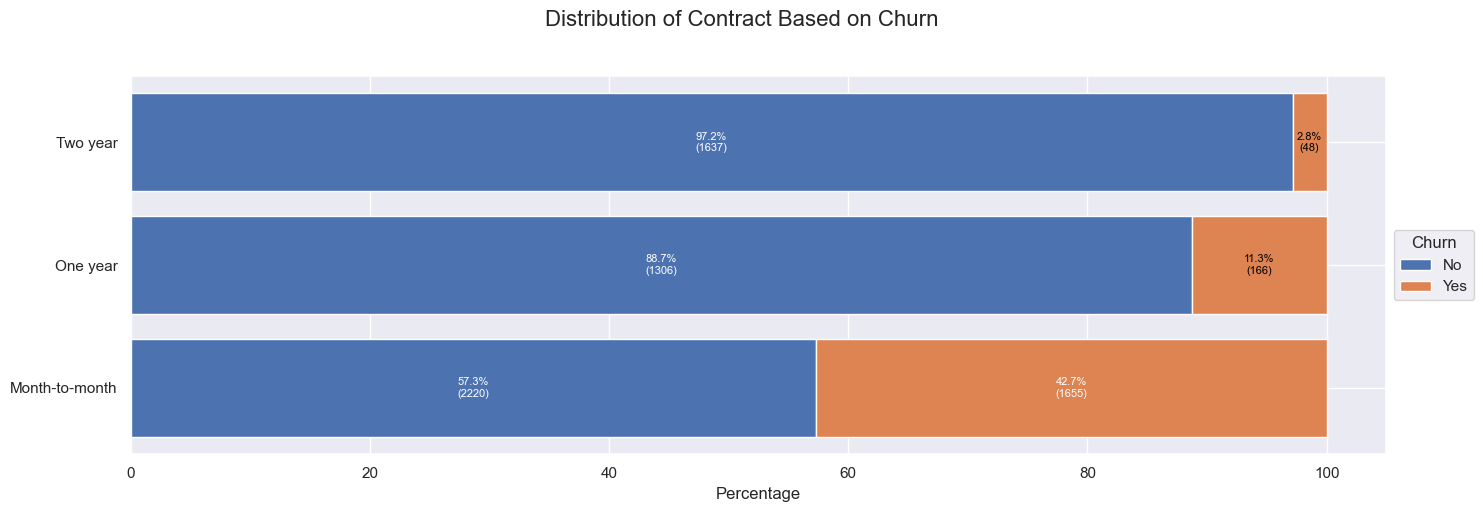

In [110]:
plot_stacked_barh_churn(df, 'Contract')

#### 2.6.18 Apakah tingkat churn berbeda antara pelanggan yang menggunakan tagihan tanpa kertas dan yang tidak?


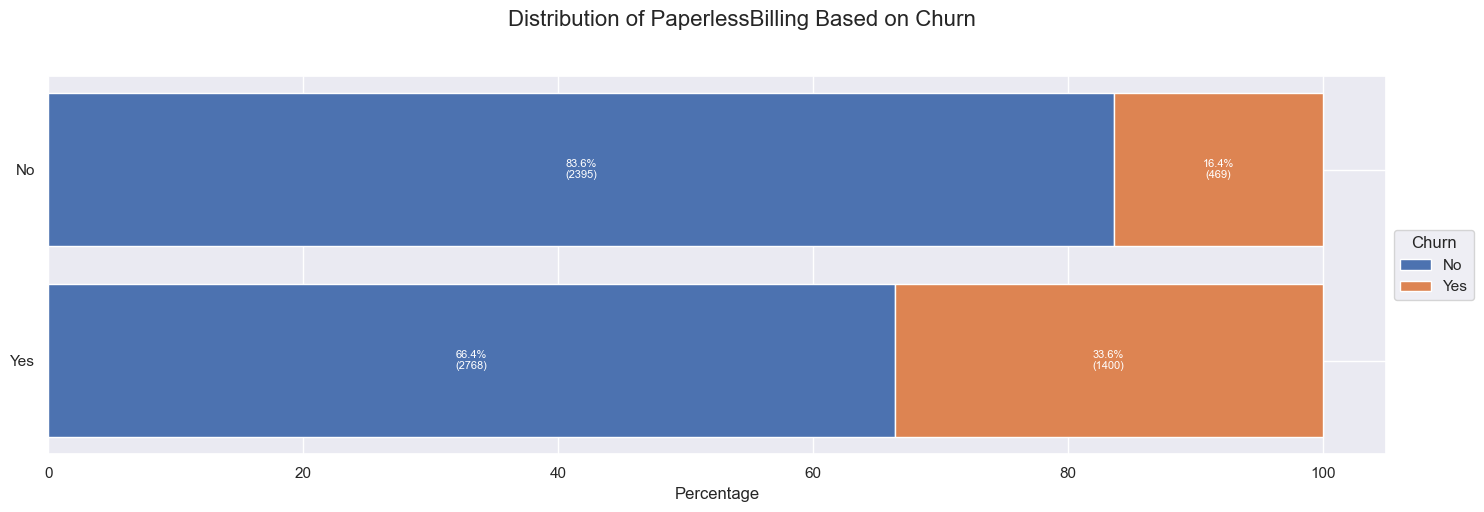

In [111]:
plot_stacked_barh_churn(df, 'PaperlessBilling')

#### 2.6.19 Apakah tingkat churn berbeda berdasarkan metode pembayaran yang digunakan pelanggan?


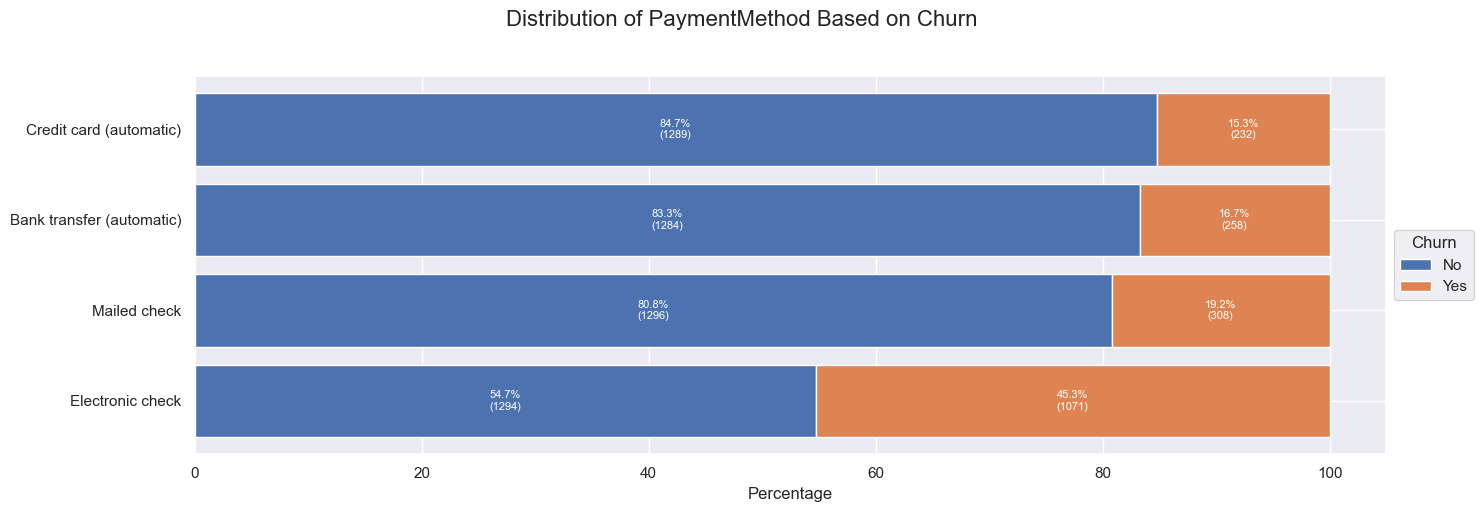

In [112]:
plot_stacked_barh_churn(df, 'PaymentMethod')

#### 2.6.20 Apa hubungan antara lama berlangganan, biaya bulanan, total pengeluaran, dan status churn pelanggan?


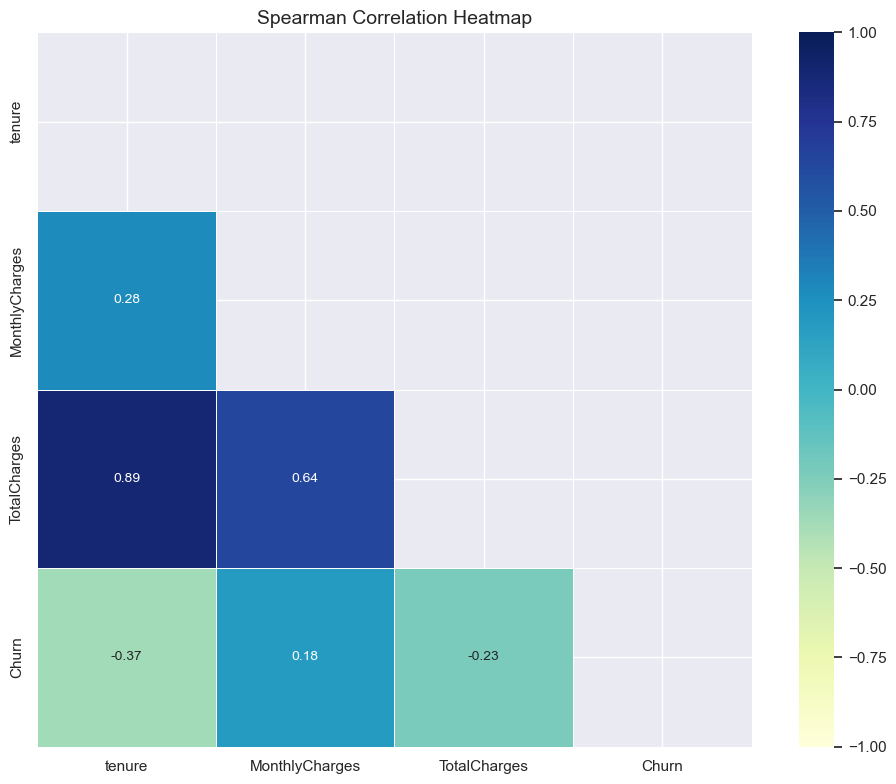

In [113]:
df['EncodedChurn'] = df['Churn'].map({'No': 0, 'Yes':1}).astype('int64')
# Hitung korelasi Spearman
corr = df.corr(method='spearman', numeric_only=True)

# Rename kolom dan index untuk visualisasi saja
corr = corr.rename(columns={'EncodedChurn': 'Churn'}, index={'EncodedChurn': 'Churn'})

# Buat mask segitiga atas
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', vmin=-1, vmax=1,
            square=True, linewidths=0.5, fmt=".2f", annot_kws={"size": 10})

plt.title("Spearman Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()
df = df.drop(columns=['EncodedChurn'])

#### 2.6.21 Bagaimana hubungan antara lama berlangganan dan biaya bulanan pelanggan?


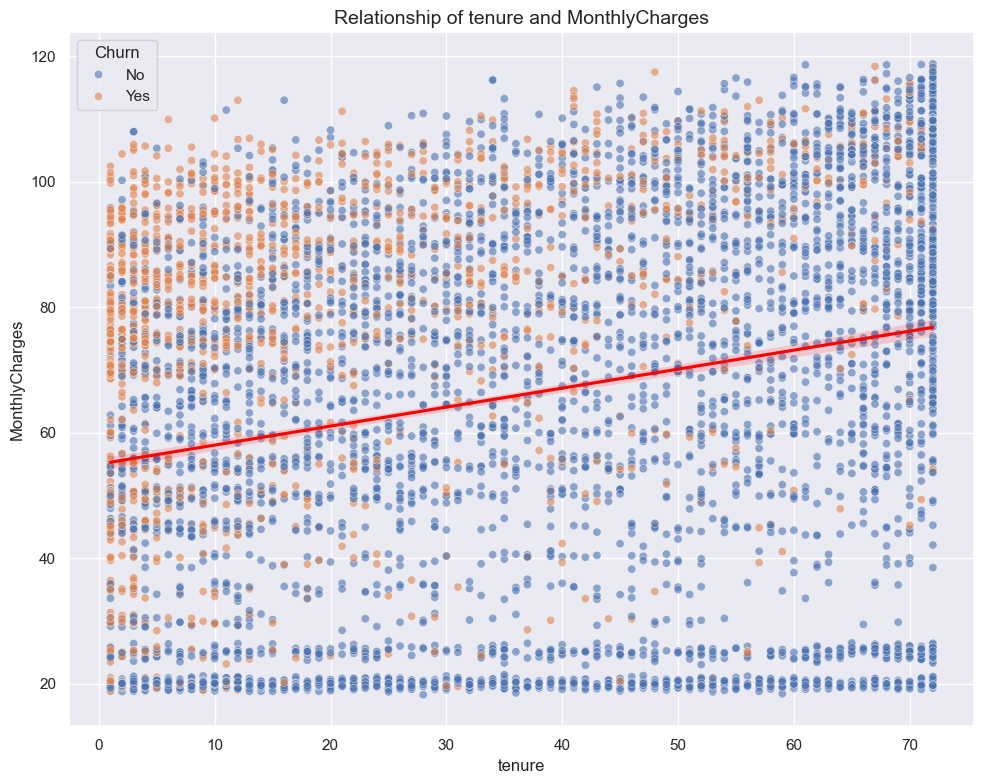

In [114]:
plot_scatter_with_reg(df, 'tenure', 'MonthlyCharges')

#### 2.6.22 Bagaimana hubungan antara lama berlangganan dan total pengeluaran pelanggan?


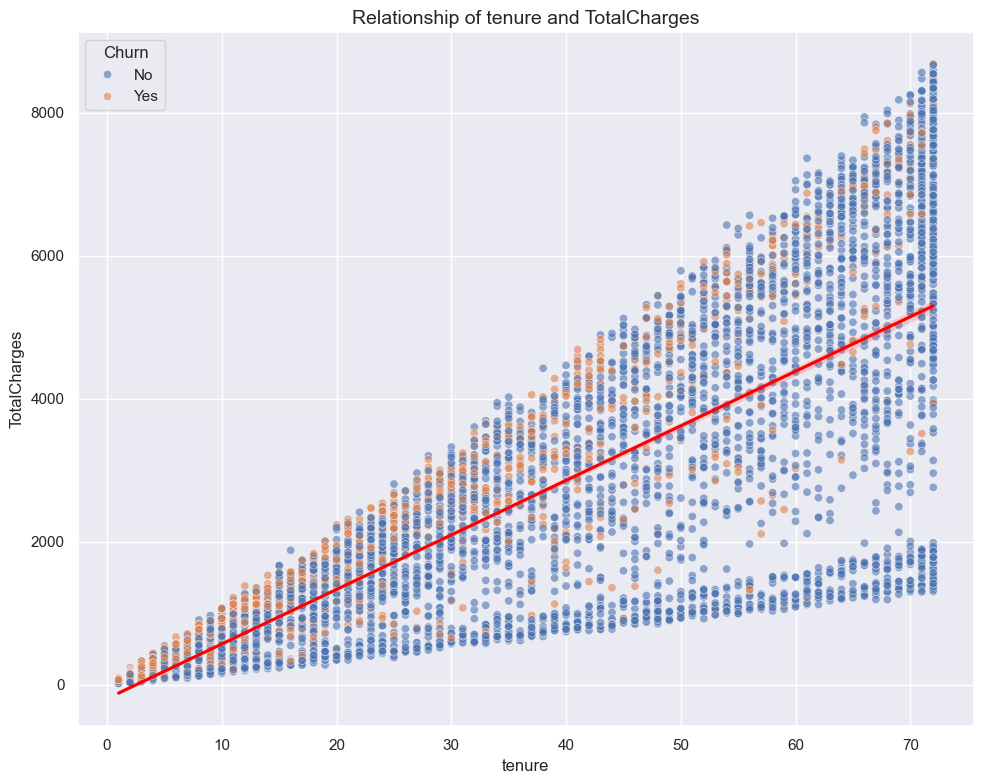

In [115]:
plot_scatter_with_reg(df, 'tenure', 'TotalCharges')

#### 2.6.23 Bagaimana hubungan antara biaya bulanan dan total pengeluaran pelanggan?


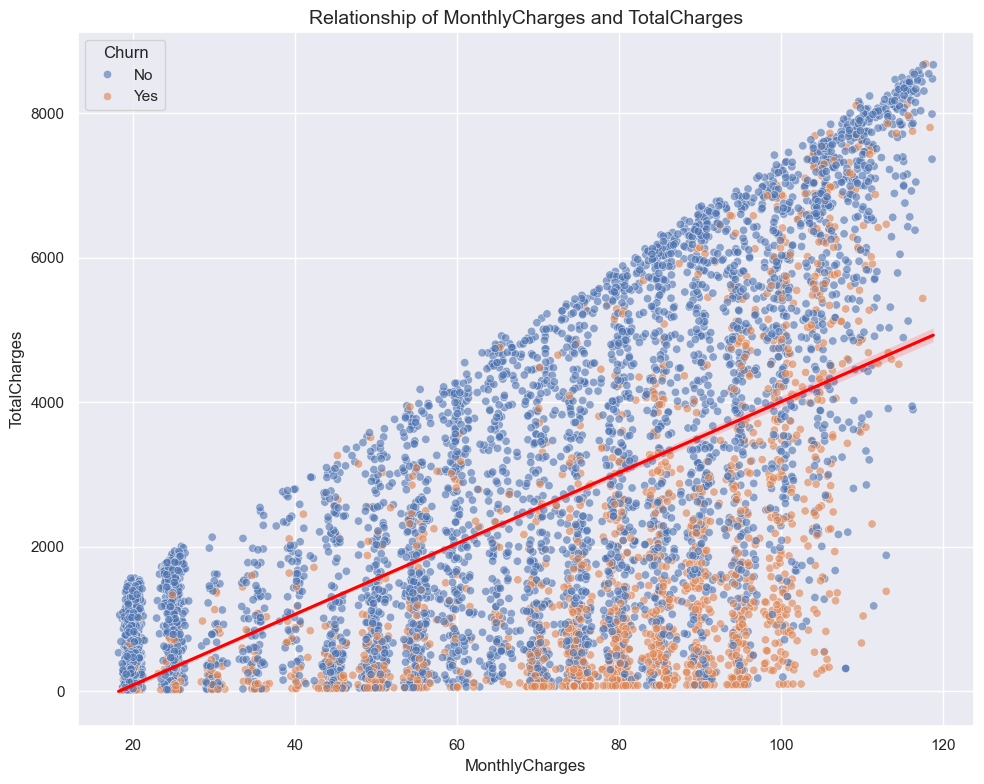

In [116]:
plot_scatter_with_reg(df, 'MonthlyCharges', 'TotalCharges')

## 2.7 Save Dataset

In [117]:
df.to_csv('../data/telco_data_eda.csv', index=False)